In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_test.shape

(212, 29)

In [10]:
x_train.shape

(844, 29)

In [11]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [12]:
cb.CatBoostRegressor?

In [13]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [14]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [15]:
regressor.fit(train_dataset)

Learning rate set to 0.03986
0:	learn: 0.4735098	total: 154ms	remaining: 2m 34s
1:	learn: 0.4666510	total: 165ms	remaining: 1m 22s
2:	learn: 0.4602085	total: 180ms	remaining: 59.7s
3:	learn: 0.4538765	total: 198ms	remaining: 49.2s
4:	learn: 0.4485402	total: 238ms	remaining: 47.5s
5:	learn: 0.4427202	total: 276ms	remaining: 45.6s
6:	learn: 0.4371401	total: 300ms	remaining: 42.5s
7:	learn: 0.4315975	total: 329ms	remaining: 40.8s
8:	learn: 0.4279891	total: 343ms	remaining: 37.8s
9:	learn: 0.4238991	total: 356ms	remaining: 35.3s
10:	learn: 0.4190250	total: 368ms	remaining: 33.1s
11:	learn: 0.4148993	total: 383ms	remaining: 31.5s
12:	learn: 0.4104016	total: 399ms	remaining: 30.3s
13:	learn: 0.4058510	total: 414ms	remaining: 29.2s
14:	learn: 0.4016909	total: 431ms	remaining: 28.3s
15:	learn: 0.3977435	total: 445ms	remaining: 27.4s
16:	learn: 0.3931070	total: 458ms	remaining: 26.5s
17:	learn: 0.3893841	total: 470ms	remaining: 25.7s
18:	learn: 0.3861026	total: 489ms	remaining: 25.2s
19:	learn:

165:	learn: 0.2338756	total: 2.08s	remaining: 10.5s
166:	learn: 0.2334994	total: 2.09s	remaining: 10.4s
167:	learn: 0.2331933	total: 2.1s	remaining: 10.4s
168:	learn: 0.2326546	total: 2.12s	remaining: 10.4s
169:	learn: 0.2321118	total: 2.13s	remaining: 10.4s
170:	learn: 0.2319242	total: 2.15s	remaining: 10.4s
171:	learn: 0.2311929	total: 2.16s	remaining: 10.4s
172:	learn: 0.2308641	total: 2.17s	remaining: 10.4s
173:	learn: 0.2306581	total: 2.17s	remaining: 10.3s
174:	learn: 0.2304958	total: 2.18s	remaining: 10.3s
175:	learn: 0.2299387	total: 2.19s	remaining: 10.3s
176:	learn: 0.2296852	total: 2.2s	remaining: 10.2s
177:	learn: 0.2294146	total: 2.2s	remaining: 10.2s
178:	learn: 0.2291010	total: 2.21s	remaining: 10.1s
179:	learn: 0.2284390	total: 2.22s	remaining: 10.1s
180:	learn: 0.2279220	total: 2.23s	remaining: 10.1s
181:	learn: 0.2272000	total: 2.23s	remaining: 10s
182:	learn: 0.2270496	total: 2.24s	remaining: 10s
183:	learn: 0.2267194	total: 2.25s	remaining: 9.98s
184:	learn: 0.22612

328:	learn: 0.1721319	total: 3.78s	remaining: 7.72s
329:	learn: 0.1717180	total: 3.79s	remaining: 7.71s
330:	learn: 0.1713209	total: 3.81s	remaining: 7.69s
331:	learn: 0.1707475	total: 3.82s	remaining: 7.69s
332:	learn: 0.1704013	total: 3.84s	remaining: 7.68s
333:	learn: 0.1700816	total: 3.85s	remaining: 7.68s
334:	learn: 0.1697062	total: 3.86s	remaining: 7.66s
335:	learn: 0.1689630	total: 3.87s	remaining: 7.64s
336:	learn: 0.1688788	total: 3.88s	remaining: 7.63s
337:	learn: 0.1683495	total: 3.88s	remaining: 7.61s
338:	learn: 0.1678055	total: 3.89s	remaining: 7.59s
339:	learn: 0.1674220	total: 3.9s	remaining: 7.57s
340:	learn: 0.1669453	total: 3.91s	remaining: 7.55s
341:	learn: 0.1665854	total: 3.91s	remaining: 7.53s
342:	learn: 0.1661577	total: 3.92s	remaining: 7.51s
343:	learn: 0.1660839	total: 3.93s	remaining: 7.49s
344:	learn: 0.1658365	total: 3.94s	remaining: 7.48s
345:	learn: 0.1654872	total: 3.95s	remaining: 7.46s
346:	learn: 0.1649714	total: 3.95s	remaining: 7.44s
347:	learn: 0

489:	learn: 0.1236597	total: 5.29s	remaining: 5.51s
490:	learn: 0.1234165	total: 5.3s	remaining: 5.5s
491:	learn: 0.1234013	total: 5.32s	remaining: 5.49s
492:	learn: 0.1231573	total: 5.32s	remaining: 5.47s
493:	learn: 0.1229200	total: 5.33s	remaining: 5.46s
494:	learn: 0.1228243	total: 5.34s	remaining: 5.45s
495:	learn: 0.1226492	total: 5.34s	remaining: 5.43s
496:	learn: 0.1226079	total: 5.35s	remaining: 5.42s
497:	learn: 0.1223489	total: 5.36s	remaining: 5.4s
498:	learn: 0.1221141	total: 5.37s	remaining: 5.39s
499:	learn: 0.1220625	total: 5.37s	remaining: 5.37s
500:	learn: 0.1218689	total: 5.38s	remaining: 5.36s
501:	learn: 0.1216358	total: 5.39s	remaining: 5.34s
502:	learn: 0.1213889	total: 5.4s	remaining: 5.33s
503:	learn: 0.1213235	total: 5.4s	remaining: 5.32s
504:	learn: 0.1211055	total: 5.41s	remaining: 5.3s
505:	learn: 0.1208828	total: 5.42s	remaining: 5.29s
506:	learn: 0.1206815	total: 5.43s	remaining: 5.28s
507:	learn: 0.1203524	total: 5.43s	remaining: 5.26s
508:	learn: 0.1203

663:	learn: 0.0927638	total: 7.02s	remaining: 3.55s
664:	learn: 0.0927150	total: 7.04s	remaining: 3.54s
665:	learn: 0.0925371	total: 7.05s	remaining: 3.53s
666:	learn: 0.0923868	total: 7.06s	remaining: 3.52s
667:	learn: 0.0922774	total: 7.07s	remaining: 3.51s
668:	learn: 0.0920994	total: 7.08s	remaining: 3.5s
669:	learn: 0.0919312	total: 7.09s	remaining: 3.49s
670:	learn: 0.0917344	total: 7.1s	remaining: 3.48s
671:	learn: 0.0915443	total: 7.11s	remaining: 3.47s
672:	learn: 0.0913468	total: 7.11s	remaining: 3.46s
673:	learn: 0.0911328	total: 7.12s	remaining: 3.44s
674:	learn: 0.0910325	total: 7.13s	remaining: 3.44s
675:	learn: 0.0909775	total: 7.14s	remaining: 3.42s
676:	learn: 0.0908265	total: 7.15s	remaining: 3.41s
677:	learn: 0.0907246	total: 7.16s	remaining: 3.4s
678:	learn: 0.0907115	total: 7.17s	remaining: 3.39s
679:	learn: 0.0904999	total: 7.18s	remaining: 3.38s
680:	learn: 0.0902469	total: 7.19s	remaining: 3.37s
681:	learn: 0.0901555	total: 7.21s	remaining: 3.36s
682:	learn: 0.0

835:	learn: 0.0726653	total: 8.76s	remaining: 1.72s
836:	learn: 0.0725926	total: 8.77s	remaining: 1.71s
837:	learn: 0.0725867	total: 8.78s	remaining: 1.7s
838:	learn: 0.0725000	total: 8.79s	remaining: 1.69s
839:	learn: 0.0724953	total: 8.8s	remaining: 1.68s
840:	learn: 0.0724666	total: 8.81s	remaining: 1.67s
841:	learn: 0.0723410	total: 8.82s	remaining: 1.65s
842:	learn: 0.0722041	total: 8.82s	remaining: 1.64s
843:	learn: 0.0720994	total: 8.83s	remaining: 1.63s
844:	learn: 0.0719314	total: 8.84s	remaining: 1.62s
845:	learn: 0.0717161	total: 8.85s	remaining: 1.61s
846:	learn: 0.0715362	total: 8.86s	remaining: 1.6s
847:	learn: 0.0714088	total: 8.87s	remaining: 1.59s
848:	learn: 0.0713319	total: 8.88s	remaining: 1.58s
849:	learn: 0.0712104	total: 8.89s	remaining: 1.57s
850:	learn: 0.0711909	total: 8.91s	remaining: 1.56s
851:	learn: 0.0711837	total: 8.91s	remaining: 1.55s
852:	learn: 0.0710934	total: 8.92s	remaining: 1.54s
853:	learn: 0.0710392	total: 8.93s	remaining: 1.53s
854:	learn: 0.0

994:	learn: 0.0595173	total: 10.3s	remaining: 51.6ms
995:	learn: 0.0594577	total: 10.3s	remaining: 41.3ms
996:	learn: 0.0593413	total: 10.3s	remaining: 31ms
997:	learn: 0.0593072	total: 10.3s	remaining: 20.6ms
998:	learn: 0.0592130	total: 10.3s	remaining: 10.3ms
999:	learn: 0.0591870	total: 10.3s	remaining: 0us


In [16]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:10.890000


In [17]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.03985999897122383


In [18]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [19]:
y_pred_train = regressor.predict(x_train)

In [20]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [21]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [22]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.1498411535318189
MSE is 0.044534558506405496
R2 score is 0.8294221787669729


In [23]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [24]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.044902377448044546
MSE is 0.0035030997609268423
R2 score is 0.9848314457778259


In [25]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

Learning rate set to 0.038478
0:	learn: 0.4811767	total: 10.8ms	remaining: 10.8s
1:	learn: 0.4746921	total: 24.8ms	remaining: 12.4s
2:	learn: 0.4689622	total: 42.2ms	remaining: 14s
3:	learn: 0.4626640	total: 61.4ms	remaining: 15.3s
4:	learn: 0.4565275	total: 75.4ms	remaining: 15s
5:	learn: 0.4514834	total: 96.2ms	remaining: 15.9s
6:	learn: 0.4468878	total: 112ms	remaining: 15.9s
7:	learn: 0.4409903	total: 122ms	remaining: 15.1s
8:	learn: 0.4355814	total: 135ms	remaining: 14.9s
9:	learn: 0.4315927	total: 146ms	remaining: 14.5s
10:	learn: 0.4270919	total: 156ms	remaining: 14.1s
11:	learn: 0.4227130	total: 164ms	remaining: 13.5s
12:	learn: 0.4182103	total: 173ms	remaining: 13.1s
13:	learn: 0.4141885	total: 180ms	remaining: 12.7s
14:	learn: 0.4108105	total: 191ms	remaining: 12.6s
15:	learn: 0.4068954	total: 201ms	remaining: 12.3s
16:	learn: 0.4034649	total: 210ms	remaining: 12.2s
17:	learn: 0.3995870	total: 217ms	remaining: 11.8s
18:	learn: 0.3959409	total: 224ms	remaining: 11.6s
19:	learn

161:	learn: 0.2428939	total: 1.7s	remaining: 8.8s
162:	learn: 0.2422366	total: 1.71s	remaining: 8.78s
163:	learn: 0.2415179	total: 1.72s	remaining: 8.76s
164:	learn: 0.2408979	total: 1.73s	remaining: 8.75s
165:	learn: 0.2406293	total: 1.74s	remaining: 8.73s
166:	learn: 0.2402304	total: 1.75s	remaining: 8.71s
167:	learn: 0.2399737	total: 1.76s	remaining: 8.71s
168:	learn: 0.2396098	total: 1.77s	remaining: 8.69s
169:	learn: 0.2391249	total: 1.78s	remaining: 8.71s
170:	learn: 0.2389761	total: 1.79s	remaining: 8.7s
171:	learn: 0.2387836	total: 1.81s	remaining: 8.71s
172:	learn: 0.2384357	total: 1.81s	remaining: 8.68s
173:	learn: 0.2381759	total: 1.82s	remaining: 8.65s
174:	learn: 0.2380258	total: 1.83s	remaining: 8.63s
175:	learn: 0.2376583	total: 1.84s	remaining: 8.6s
176:	learn: 0.2372401	total: 1.84s	remaining: 8.58s
177:	learn: 0.2365283	total: 1.85s	remaining: 8.55s
178:	learn: 0.2362430	total: 1.86s	remaining: 8.53s
179:	learn: 0.2361899	total: 1.86s	remaining: 8.5s
180:	learn: 0.235

332:	learn: 0.1709939	total: 3.12s	remaining: 6.25s
333:	learn: 0.1709165	total: 3.13s	remaining: 6.24s
334:	learn: 0.1704952	total: 3.14s	remaining: 6.23s
335:	learn: 0.1703372	total: 3.15s	remaining: 6.23s
336:	learn: 0.1699639	total: 3.16s	remaining: 6.22s
337:	learn: 0.1693635	total: 3.18s	remaining: 6.23s
338:	learn: 0.1690510	total: 3.19s	remaining: 6.22s
339:	learn: 0.1687446	total: 3.2s	remaining: 6.21s
340:	learn: 0.1679736	total: 3.2s	remaining: 6.19s
341:	learn: 0.1676001	total: 3.21s	remaining: 6.18s
342:	learn: 0.1672001	total: 3.22s	remaining: 6.17s
343:	learn: 0.1668213	total: 3.23s	remaining: 6.15s
344:	learn: 0.1663407	total: 3.23s	remaining: 6.14s
345:	learn: 0.1657466	total: 3.24s	remaining: 6.13s
346:	learn: 0.1657016	total: 3.25s	remaining: 6.12s
347:	learn: 0.1653273	total: 3.26s	remaining: 6.1s
348:	learn: 0.1649576	total: 3.26s	remaining: 6.09s
349:	learn: 0.1645279	total: 3.27s	remaining: 6.08s
350:	learn: 0.1642845	total: 3.28s	remaining: 6.06s
351:	learn: 0.1

502:	learn: 0.1255764	total: 4.61s	remaining: 4.55s
503:	learn: 0.1251727	total: 4.61s	remaining: 4.54s
504:	learn: 0.1251447	total: 4.62s	remaining: 4.53s
505:	learn: 0.1249141	total: 4.63s	remaining: 4.53s
506:	learn: 0.1246569	total: 4.65s	remaining: 4.52s
507:	learn: 0.1246298	total: 4.67s	remaining: 4.52s
508:	learn: 0.1245310	total: 4.68s	remaining: 4.51s
509:	learn: 0.1243880	total: 4.69s	remaining: 4.51s
510:	learn: 0.1242973	total: 4.7s	remaining: 4.5s
511:	learn: 0.1241432	total: 4.71s	remaining: 4.49s
512:	learn: 0.1238200	total: 4.72s	remaining: 4.48s
513:	learn: 0.1235571	total: 4.72s	remaining: 4.46s
514:	learn: 0.1234503	total: 4.73s	remaining: 4.45s
515:	learn: 0.1232286	total: 4.74s	remaining: 4.44s
516:	learn: 0.1230997	total: 4.74s	remaining: 4.43s
517:	learn: 0.1230440	total: 4.75s	remaining: 4.42s
518:	learn: 0.1228968	total: 4.76s	remaining: 4.41s
519:	learn: 0.1224212	total: 4.76s	remaining: 4.4s
520:	learn: 0.1221882	total: 4.77s	remaining: 4.39s
521:	learn: 0.1

664:	learn: 0.0972306	total: 6.08s	remaining: 3.06s
665:	learn: 0.0969406	total: 6.09s	remaining: 3.05s
666:	learn: 0.0967117	total: 6.1s	remaining: 3.04s
667:	learn: 0.0964037	total: 6.11s	remaining: 3.04s
668:	learn: 0.0962788	total: 6.12s	remaining: 3.03s
669:	learn: 0.0962486	total: 6.13s	remaining: 3.02s
670:	learn: 0.0959814	total: 6.13s	remaining: 3.01s
671:	learn: 0.0958150	total: 6.14s	remaining: 3s
672:	learn: 0.0956033	total: 6.15s	remaining: 2.99s
673:	learn: 0.0953551	total: 6.16s	remaining: 2.98s
674:	learn: 0.0951624	total: 6.17s	remaining: 2.97s
675:	learn: 0.0949733	total: 6.18s	remaining: 2.96s
676:	learn: 0.0948743	total: 6.19s	remaining: 2.95s
677:	learn: 0.0947829	total: 6.2s	remaining: 2.95s
678:	learn: 0.0946685	total: 6.21s	remaining: 2.94s
679:	learn: 0.0945236	total: 6.22s	remaining: 2.93s
680:	learn: 0.0944099	total: 6.23s	remaining: 2.92s
681:	learn: 0.0942890	total: 6.24s	remaining: 2.91s
682:	learn: 0.0940845	total: 6.25s	remaining: 2.9s
683:	learn: 0.0940

838:	learn: 0.0740141	total: 7.57s	remaining: 1.45s
839:	learn: 0.0738404	total: 7.58s	remaining: 1.44s
840:	learn: 0.0738094	total: 7.59s	remaining: 1.44s
841:	learn: 0.0737813	total: 7.6s	remaining: 1.43s
842:	learn: 0.0736326	total: 7.61s	remaining: 1.42s
843:	learn: 0.0734471	total: 7.62s	remaining: 1.41s
844:	learn: 0.0732645	total: 7.63s	remaining: 1.4s
845:	learn: 0.0731324	total: 7.65s	remaining: 1.39s
846:	learn: 0.0730213	total: 7.66s	remaining: 1.38s
847:	learn: 0.0728906	total: 7.66s	remaining: 1.37s
848:	learn: 0.0728032	total: 7.67s	remaining: 1.36s
849:	learn: 0.0725864	total: 7.68s	remaining: 1.35s
850:	learn: 0.0724492	total: 7.69s	remaining: 1.35s
851:	learn: 0.0723408	total: 7.7s	remaining: 1.34s
852:	learn: 0.0723268	total: 7.7s	remaining: 1.33s
853:	learn: 0.0722389	total: 7.71s	remaining: 1.32s
854:	learn: 0.0721334	total: 7.72s	remaining: 1.31s
855:	learn: 0.0720772	total: 7.72s	remaining: 1.3s
856:	learn: 0.0719755	total: 7.73s	remaining: 1.29s
857:	learn: 0.071

Learning rate set to 0.038478
0:	learn: 0.4686160	total: 8.61ms	remaining: 8.61s
1:	learn: 0.4619616	total: 16.8ms	remaining: 8.39s
2:	learn: 0.4563686	total: 23.8ms	remaining: 7.91s
3:	learn: 0.4505204	total: 32.1ms	remaining: 8s
4:	learn: 0.4458925	total: 39.1ms	remaining: 7.77s
5:	learn: 0.4410444	total: 46.3ms	remaining: 7.67s
6:	learn: 0.4359979	total: 52.9ms	remaining: 7.5s
7:	learn: 0.4299553	total: 59.5ms	remaining: 7.37s
8:	learn: 0.4248435	total: 66.1ms	remaining: 7.28s
9:	learn: 0.4199326	total: 72.8ms	remaining: 7.2s
10:	learn: 0.4147255	total: 80.4ms	remaining: 7.23s
11:	learn: 0.4101047	total: 89.5ms	remaining: 7.37s
12:	learn: 0.4055925	total: 101ms	remaining: 7.67s
13:	learn: 0.4009140	total: 110ms	remaining: 7.72s
14:	learn: 0.3965434	total: 118ms	remaining: 7.76s
15:	learn: 0.3929698	total: 133ms	remaining: 8.15s
16:	learn: 0.3883979	total: 143ms	remaining: 8.28s
17:	learn: 0.3849873	total: 151ms	remaining: 8.27s
18:	learn: 0.3810706	total: 164ms	remaining: 8.45s
19:	

160:	learn: 0.2301924	total: 1.31s	remaining: 6.84s
161:	learn: 0.2298033	total: 1.32s	remaining: 6.83s
162:	learn: 0.2292370	total: 1.33s	remaining: 6.82s
163:	learn: 0.2288482	total: 1.33s	remaining: 6.81s
164:	learn: 0.2283008	total: 1.34s	remaining: 6.79s
165:	learn: 0.2278917	total: 1.35s	remaining: 6.78s
166:	learn: 0.2274606	total: 1.36s	remaining: 6.78s
167:	learn: 0.2269666	total: 1.37s	remaining: 6.78s
168:	learn: 0.2263892	total: 1.38s	remaining: 6.78s
169:	learn: 0.2255294	total: 1.39s	remaining: 6.79s
170:	learn: 0.2250805	total: 1.4s	remaining: 6.81s
171:	learn: 0.2245326	total: 1.42s	remaining: 6.83s
172:	learn: 0.2241966	total: 1.43s	remaining: 6.83s
173:	learn: 0.2241190	total: 1.44s	remaining: 6.84s
174:	learn: 0.2236735	total: 1.45s	remaining: 6.83s
175:	learn: 0.2229879	total: 1.46s	remaining: 6.82s
176:	learn: 0.2226325	total: 1.46s	remaining: 6.81s
177:	learn: 0.2223778	total: 1.47s	remaining: 6.79s
178:	learn: 0.2219643	total: 1.48s	remaining: 6.78s
179:	learn: 0

322:	learn: 0.1707374	total: 2.65s	remaining: 5.56s
323:	learn: 0.1702093	total: 2.66s	remaining: 5.55s
324:	learn: 0.1699706	total: 2.67s	remaining: 5.54s
325:	learn: 0.1695337	total: 2.68s	remaining: 5.53s
326:	learn: 0.1694230	total: 2.68s	remaining: 5.52s
327:	learn: 0.1686717	total: 2.69s	remaining: 5.51s
328:	learn: 0.1685434	total: 2.7s	remaining: 5.5s
329:	learn: 0.1683516	total: 2.7s	remaining: 5.49s
330:	learn: 0.1677864	total: 2.71s	remaining: 5.48s
331:	learn: 0.1673891	total: 2.72s	remaining: 5.47s
332:	learn: 0.1667879	total: 2.72s	remaining: 5.46s
333:	learn: 0.1664010	total: 2.73s	remaining: 5.45s
334:	learn: 0.1660536	total: 2.74s	remaining: 5.44s
335:	learn: 0.1656215	total: 2.75s	remaining: 5.43s
336:	learn: 0.1652861	total: 2.75s	remaining: 5.42s
337:	learn: 0.1650119	total: 2.76s	remaining: 5.41s
338:	learn: 0.1648975	total: 2.77s	remaining: 5.41s
339:	learn: 0.1643972	total: 2.78s	remaining: 5.4s
340:	learn: 0.1640662	total: 2.79s	remaining: 5.39s
341:	learn: 0.16

488:	learn: 0.1208839	total: 4.05s	remaining: 4.23s
489:	learn: 0.1208513	total: 4.05s	remaining: 4.22s
490:	learn: 0.1204981	total: 4.06s	remaining: 4.21s
491:	learn: 0.1204775	total: 4.07s	remaining: 4.2s
492:	learn: 0.1202091	total: 4.08s	remaining: 4.19s
493:	learn: 0.1199303	total: 4.08s	remaining: 4.18s
494:	learn: 0.1196515	total: 4.09s	remaining: 4.17s
495:	learn: 0.1192679	total: 4.1s	remaining: 4.16s
496:	learn: 0.1191780	total: 4.11s	remaining: 4.15s
497:	learn: 0.1190477	total: 4.11s	remaining: 4.15s
498:	learn: 0.1188475	total: 4.13s	remaining: 4.14s
499:	learn: 0.1185422	total: 4.13s	remaining: 4.13s
500:	learn: 0.1182830	total: 4.14s	remaining: 4.13s
501:	learn: 0.1182156	total: 4.15s	remaining: 4.12s
502:	learn: 0.1180238	total: 4.16s	remaining: 4.11s
503:	learn: 0.1177507	total: 4.17s	remaining: 4.11s
504:	learn: 0.1174025	total: 4.18s	remaining: 4.1s
505:	learn: 0.1173835	total: 4.2s	remaining: 4.09s
506:	learn: 0.1170363	total: 4.21s	remaining: 4.09s
507:	learn: 0.11

656:	learn: 0.0913247	total: 5.4s	remaining: 2.82s
657:	learn: 0.0912636	total: 5.41s	remaining: 2.81s
658:	learn: 0.0911285	total: 5.42s	remaining: 2.81s
659:	learn: 0.0908474	total: 5.43s	remaining: 2.8s
660:	learn: 0.0907249	total: 5.44s	remaining: 2.79s
661:	learn: 0.0905319	total: 5.45s	remaining: 2.78s
662:	learn: 0.0905123	total: 5.46s	remaining: 2.78s
663:	learn: 0.0903590	total: 5.47s	remaining: 2.77s
664:	learn: 0.0902589	total: 5.48s	remaining: 2.76s
665:	learn: 0.0901196	total: 5.48s	remaining: 2.75s
666:	learn: 0.0900889	total: 5.49s	remaining: 2.74s
667:	learn: 0.0898557	total: 5.5s	remaining: 2.73s
668:	learn: 0.0896916	total: 5.51s	remaining: 2.73s
669:	learn: 0.0894607	total: 5.52s	remaining: 2.72s
670:	learn: 0.0892694	total: 5.52s	remaining: 2.71s
671:	learn: 0.0889894	total: 5.53s	remaining: 2.7s
672:	learn: 0.0888954	total: 5.54s	remaining: 2.69s
673:	learn: 0.0888679	total: 5.54s	remaining: 2.68s
674:	learn: 0.0888462	total: 5.55s	remaining: 2.67s
675:	learn: 0.08

817:	learn: 0.0726224	total: 6.72s	remaining: 1.49s
818:	learn: 0.0725667	total: 6.73s	remaining: 1.49s
819:	learn: 0.0724621	total: 6.75s	remaining: 1.48s
820:	learn: 0.0722262	total: 6.76s	remaining: 1.47s
821:	learn: 0.0720772	total: 6.77s	remaining: 1.47s
822:	learn: 0.0720302	total: 6.78s	remaining: 1.46s
823:	learn: 0.0719605	total: 6.79s	remaining: 1.45s
824:	learn: 0.0718438	total: 6.8s	remaining: 1.44s
825:	learn: 0.0717244	total: 6.81s	remaining: 1.43s
826:	learn: 0.0715282	total: 6.81s	remaining: 1.43s
827:	learn: 0.0714594	total: 6.82s	remaining: 1.42s
828:	learn: 0.0713680	total: 6.83s	remaining: 1.41s
829:	learn: 0.0711866	total: 6.83s	remaining: 1.4s
830:	learn: 0.0710495	total: 6.84s	remaining: 1.39s
831:	learn: 0.0709856	total: 6.85s	remaining: 1.38s
832:	learn: 0.0709138	total: 6.85s	remaining: 1.37s
833:	learn: 0.0707349	total: 6.86s	remaining: 1.36s
834:	learn: 0.0707086	total: 6.87s	remaining: 1.36s
835:	learn: 0.0706623	total: 6.87s	remaining: 1.35s
836:	learn: 0.

977:	learn: 0.0579226	total: 8.04s	remaining: 181ms
978:	learn: 0.0577598	total: 8.06s	remaining: 173ms
979:	learn: 0.0577520	total: 8.07s	remaining: 165ms
980:	learn: 0.0576384	total: 8.08s	remaining: 156ms
981:	learn: 0.0575682	total: 8.09s	remaining: 148ms
982:	learn: 0.0575143	total: 8.09s	remaining: 140ms
983:	learn: 0.0574187	total: 8.1s	remaining: 132ms
984:	learn: 0.0572972	total: 8.11s	remaining: 124ms
985:	learn: 0.0572351	total: 8.12s	remaining: 115ms
986:	learn: 0.0571353	total: 8.13s	remaining: 107ms
987:	learn: 0.0571152	total: 8.13s	remaining: 98.8ms
988:	learn: 0.0570524	total: 8.14s	remaining: 90.5ms
989:	learn: 0.0569938	total: 8.14s	remaining: 82.3ms
990:	learn: 0.0569804	total: 8.15s	remaining: 74ms
991:	learn: 0.0568674	total: 8.16s	remaining: 65.8ms
992:	learn: 0.0568511	total: 8.17s	remaining: 57.6ms
993:	learn: 0.0567812	total: 8.17s	remaining: 49.3ms
994:	learn: 0.0567727	total: 8.18s	remaining: 41.1ms
995:	learn: 0.0566930	total: 8.19s	remaining: 32.9ms
996:	l

143:	learn: 0.2573675	total: 1.13s	remaining: 6.72s
144:	learn: 0.2570403	total: 1.14s	remaining: 6.72s
145:	learn: 0.2566223	total: 1.15s	remaining: 6.72s
146:	learn: 0.2560585	total: 1.16s	remaining: 6.73s
147:	learn: 0.2554017	total: 1.17s	remaining: 6.72s
148:	learn: 0.2545616	total: 1.18s	remaining: 6.72s
149:	learn: 0.2540470	total: 1.19s	remaining: 6.73s
150:	learn: 0.2535776	total: 1.2s	remaining: 6.72s
151:	learn: 0.2525891	total: 1.2s	remaining: 6.72s
152:	learn: 0.2517345	total: 1.21s	remaining: 6.71s
153:	learn: 0.2509777	total: 1.22s	remaining: 6.72s
154:	learn: 0.2505654	total: 1.23s	remaining: 6.72s
155:	learn: 0.2503531	total: 1.24s	remaining: 6.72s
156:	learn: 0.2499228	total: 1.25s	remaining: 6.7s
157:	learn: 0.2492605	total: 1.25s	remaining: 6.69s
158:	learn: 0.2485658	total: 1.26s	remaining: 6.67s
159:	learn: 0.2482747	total: 1.27s	remaining: 6.66s
160:	learn: 0.2475343	total: 1.27s	remaining: 6.64s
161:	learn: 0.2466619	total: 1.28s	remaining: 6.63s
162:	learn: 0.2

309:	learn: 0.1772556	total: 2.42s	remaining: 5.38s
310:	learn: 0.1767887	total: 2.43s	remaining: 5.39s
311:	learn: 0.1765075	total: 2.44s	remaining: 5.39s
312:	learn: 0.1759929	total: 2.45s	remaining: 5.38s
313:	learn: 0.1754299	total: 2.46s	remaining: 5.37s
314:	learn: 0.1749231	total: 2.46s	remaining: 5.36s
315:	learn: 0.1747067	total: 2.47s	remaining: 5.35s
316:	learn: 0.1744801	total: 2.48s	remaining: 5.34s
317:	learn: 0.1743397	total: 2.48s	remaining: 5.33s
318:	learn: 0.1737866	total: 2.49s	remaining: 5.32s
319:	learn: 0.1732023	total: 2.5s	remaining: 5.31s
320:	learn: 0.1729562	total: 2.51s	remaining: 5.3s
321:	learn: 0.1725928	total: 2.51s	remaining: 5.29s
322:	learn: 0.1721630	total: 2.52s	remaining: 5.28s
323:	learn: 0.1717291	total: 2.53s	remaining: 5.27s
324:	learn: 0.1710703	total: 2.53s	remaining: 5.26s
325:	learn: 0.1704579	total: 2.54s	remaining: 5.25s
326:	learn: 0.1701303	total: 2.55s	remaining: 5.25s
327:	learn: 0.1694821	total: 2.56s	remaining: 5.25s
328:	learn: 0.

480:	learn: 0.1285620	total: 4.11s	remaining: 4.44s
481:	learn: 0.1281732	total: 4.12s	remaining: 4.43s
482:	learn: 0.1280559	total: 4.13s	remaining: 4.42s
483:	learn: 0.1276282	total: 4.15s	remaining: 4.43s
484:	learn: 0.1275451	total: 4.17s	remaining: 4.43s
485:	learn: 0.1273861	total: 4.19s	remaining: 4.43s
486:	learn: 0.1273138	total: 4.21s	remaining: 4.43s
487:	learn: 0.1272114	total: 4.22s	remaining: 4.42s
488:	learn: 0.1270181	total: 4.23s	remaining: 4.42s
489:	learn: 0.1269390	total: 4.24s	remaining: 4.41s
490:	learn: 0.1267995	total: 4.25s	remaining: 4.4s
491:	learn: 0.1265867	total: 4.26s	remaining: 4.4s
492:	learn: 0.1262109	total: 4.26s	remaining: 4.39s
493:	learn: 0.1260627	total: 4.28s	remaining: 4.38s
494:	learn: 0.1260389	total: 4.28s	remaining: 4.37s
495:	learn: 0.1259998	total: 4.3s	remaining: 4.37s
496:	learn: 0.1259223	total: 4.31s	remaining: 4.36s
497:	learn: 0.1256059	total: 4.32s	remaining: 4.35s
498:	learn: 0.1251493	total: 4.33s	remaining: 4.34s
499:	learn: 0.1

649:	learn: 0.0973013	total: 5.6s	remaining: 3.02s
650:	learn: 0.0971072	total: 5.61s	remaining: 3.01s
651:	learn: 0.0970920	total: 5.62s	remaining: 3s
652:	learn: 0.0969665	total: 5.63s	remaining: 2.99s
653:	learn: 0.0969096	total: 5.64s	remaining: 2.98s
654:	learn: 0.0966933	total: 5.66s	remaining: 2.98s
655:	learn: 0.0965076	total: 5.67s	remaining: 2.97s
656:	learn: 0.0963866	total: 5.67s	remaining: 2.96s
657:	learn: 0.0963268	total: 5.68s	remaining: 2.95s
658:	learn: 0.0961414	total: 5.69s	remaining: 2.94s
659:	learn: 0.0959793	total: 5.7s	remaining: 2.93s
660:	learn: 0.0958169	total: 5.7s	remaining: 2.92s
661:	learn: 0.0955815	total: 5.71s	remaining: 2.92s
662:	learn: 0.0954171	total: 5.72s	remaining: 2.91s
663:	learn: 0.0953276	total: 5.72s	remaining: 2.9s
664:	learn: 0.0951783	total: 5.73s	remaining: 2.89s
665:	learn: 0.0950443	total: 5.74s	remaining: 2.88s
666:	learn: 0.0949360	total: 5.75s	remaining: 2.87s
667:	learn: 0.0947765	total: 5.75s	remaining: 2.86s
668:	learn: 0.09461

814:	learn: 0.0749391	total: 6.88s	remaining: 1.56s
815:	learn: 0.0747697	total: 6.89s	remaining: 1.55s
816:	learn: 0.0746545	total: 6.9s	remaining: 1.55s
817:	learn: 0.0744421	total: 6.91s	remaining: 1.54s
818:	learn: 0.0742060	total: 6.92s	remaining: 1.53s
819:	learn: 0.0740921	total: 6.93s	remaining: 1.52s
820:	learn: 0.0739671	total: 6.93s	remaining: 1.51s
821:	learn: 0.0739328	total: 6.95s	remaining: 1.5s
822:	learn: 0.0739228	total: 6.96s	remaining: 1.5s
823:	learn: 0.0737940	total: 6.98s	remaining: 1.49s
824:	learn: 0.0737253	total: 6.99s	remaining: 1.48s
825:	learn: 0.0735266	total: 7s	remaining: 1.48s
826:	learn: 0.0734805	total: 7.01s	remaining: 1.47s
827:	learn: 0.0733642	total: 7.01s	remaining: 1.46s
828:	learn: 0.0733406	total: 7.02s	remaining: 1.45s
829:	learn: 0.0732328	total: 7.03s	remaining: 1.44s
830:	learn: 0.0729966	total: 7.04s	remaining: 1.43s
831:	learn: 0.0729448	total: 7.05s	remaining: 1.42s
832:	learn: 0.0727571	total: 7.06s	remaining: 1.41s
833:	learn: 0.0725

974:	learn: 0.0601029	total: 8.16s	remaining: 209ms
975:	learn: 0.0600298	total: 8.17s	remaining: 201ms
976:	learn: 0.0599713	total: 8.18s	remaining: 193ms
977:	learn: 0.0598981	total: 8.19s	remaining: 184ms
978:	learn: 0.0598043	total: 8.2s	remaining: 176ms
979:	learn: 0.0597830	total: 8.21s	remaining: 167ms
980:	learn: 0.0597048	total: 8.21s	remaining: 159ms
981:	learn: 0.0596020	total: 8.22s	remaining: 151ms
982:	learn: 0.0594942	total: 8.23s	remaining: 142ms
983:	learn: 0.0594175	total: 8.24s	remaining: 134ms
984:	learn: 0.0592458	total: 8.24s	remaining: 126ms
985:	learn: 0.0591773	total: 8.25s	remaining: 117ms
986:	learn: 0.0590556	total: 8.26s	remaining: 109ms
987:	learn: 0.0589328	total: 8.27s	remaining: 100ms
988:	learn: 0.0588850	total: 8.28s	remaining: 92.1ms
989:	learn: 0.0587968	total: 8.29s	remaining: 83.7ms
990:	learn: 0.0586744	total: 8.29s	remaining: 75.3ms
991:	learn: 0.0586205	total: 8.3s	remaining: 66.9ms
992:	learn: 0.0585103	total: 8.31s	remaining: 58.6ms
993:	lear

148:	learn: 0.2391646	total: 1.21s	remaining: 6.93s
149:	learn: 0.2387683	total: 1.22s	remaining: 6.92s
150:	learn: 0.2380859	total: 1.23s	remaining: 6.93s
151:	learn: 0.2374153	total: 1.24s	remaining: 6.91s
152:	learn: 0.2368576	total: 1.25s	remaining: 6.9s
153:	learn: 0.2359408	total: 1.25s	remaining: 6.89s
154:	learn: 0.2353930	total: 1.26s	remaining: 6.88s
155:	learn: 0.2350515	total: 1.27s	remaining: 6.86s
156:	learn: 0.2347909	total: 1.28s	remaining: 6.86s
157:	learn: 0.2343732	total: 1.28s	remaining: 6.84s
158:	learn: 0.2340006	total: 1.29s	remaining: 6.85s
159:	learn: 0.2334589	total: 1.3s	remaining: 6.83s
160:	learn: 0.2327639	total: 1.31s	remaining: 6.82s
161:	learn: 0.2320019	total: 1.31s	remaining: 6.81s
162:	learn: 0.2315771	total: 1.32s	remaining: 6.8s
163:	learn: 0.2312793	total: 1.33s	remaining: 6.78s
164:	learn: 0.2310450	total: 1.34s	remaining: 6.77s
165:	learn: 0.2303537	total: 1.34s	remaining: 6.76s
166:	learn: 0.2299018	total: 1.35s	remaining: 6.76s
167:	learn: 0.2

323:	learn: 0.1695391	total: 2.7s	remaining: 5.63s
324:	learn: 0.1690941	total: 2.7s	remaining: 5.62s
325:	learn: 0.1687719	total: 2.71s	remaining: 5.61s
326:	learn: 0.1683569	total: 2.72s	remaining: 5.6s
327:	learn: 0.1675732	total: 2.73s	remaining: 5.6s
328:	learn: 0.1674998	total: 2.74s	remaining: 5.6s
329:	learn: 0.1674680	total: 2.76s	remaining: 5.6s
330:	learn: 0.1668502	total: 2.77s	remaining: 5.59s
331:	learn: 0.1664843	total: 2.77s	remaining: 5.58s
332:	learn: 0.1659963	total: 2.78s	remaining: 5.58s
333:	learn: 0.1655166	total: 2.79s	remaining: 5.57s
334:	learn: 0.1649618	total: 2.81s	remaining: 5.57s
335:	learn: 0.1647929	total: 2.82s	remaining: 5.57s
336:	learn: 0.1643969	total: 2.83s	remaining: 5.56s
337:	learn: 0.1641327	total: 2.83s	remaining: 5.55s
338:	learn: 0.1641014	total: 2.84s	remaining: 5.54s
339:	learn: 0.1634678	total: 2.85s	remaining: 5.54s
340:	learn: 0.1634120	total: 2.86s	remaining: 5.53s
341:	learn: 0.1628796	total: 2.87s	remaining: 5.52s
342:	learn: 0.1624

490:	learn: 0.1224166	total: 4.41s	remaining: 4.58s
491:	learn: 0.1220278	total: 4.43s	remaining: 4.58s
492:	learn: 0.1215375	total: 4.45s	remaining: 4.57s
493:	learn: 0.1212181	total: 4.46s	remaining: 4.57s
494:	learn: 0.1209942	total: 4.48s	remaining: 4.57s
495:	learn: 0.1206701	total: 4.49s	remaining: 4.56s
496:	learn: 0.1204175	total: 4.5s	remaining: 4.55s
497:	learn: 0.1201002	total: 4.5s	remaining: 4.54s
498:	learn: 0.1198176	total: 4.51s	remaining: 4.53s
499:	learn: 0.1194894	total: 4.52s	remaining: 4.52s
500:	learn: 0.1191747	total: 4.53s	remaining: 4.52s
501:	learn: 0.1191149	total: 4.54s	remaining: 4.51s
502:	learn: 0.1187528	total: 4.55s	remaining: 4.5s
503:	learn: 0.1184851	total: 4.56s	remaining: 4.49s
504:	learn: 0.1182465	total: 4.57s	remaining: 4.48s
505:	learn: 0.1181133	total: 4.58s	remaining: 4.47s
506:	learn: 0.1177621	total: 4.59s	remaining: 4.46s
507:	learn: 0.1175024	total: 4.61s	remaining: 4.46s
508:	learn: 0.1173986	total: 4.62s	remaining: 4.45s
509:	learn: 0.1

651:	learn: 0.0925073	total: 6.14s	remaining: 3.28s
652:	learn: 0.0923781	total: 6.18s	remaining: 3.28s
653:	learn: 0.0922791	total: 6.2s	remaining: 3.28s
654:	learn: 0.0921510	total: 6.22s	remaining: 3.27s
655:	learn: 0.0919755	total: 6.23s	remaining: 3.27s
656:	learn: 0.0917243	total: 6.24s	remaining: 3.26s
657:	learn: 0.0916149	total: 6.25s	remaining: 3.25s
658:	learn: 0.0916049	total: 6.26s	remaining: 3.24s
659:	learn: 0.0915583	total: 6.27s	remaining: 3.23s
660:	learn: 0.0914180	total: 6.28s	remaining: 3.22s
661:	learn: 0.0913104	total: 6.29s	remaining: 3.21s
662:	learn: 0.0912409	total: 6.3s	remaining: 3.2s
663:	learn: 0.0911202	total: 6.31s	remaining: 3.19s
664:	learn: 0.0910019	total: 6.33s	remaining: 3.19s
665:	learn: 0.0908557	total: 6.33s	remaining: 3.18s
666:	learn: 0.0907881	total: 6.34s	remaining: 3.17s
667:	learn: 0.0906422	total: 6.35s	remaining: 3.16s
668:	learn: 0.0904315	total: 6.36s	remaining: 3.15s
669:	learn: 0.0903424	total: 6.37s	remaining: 3.14s
670:	learn: 0.0

819:	learn: 0.0721311	total: 7.68s	remaining: 1.69s
820:	learn: 0.0720189	total: 7.68s	remaining: 1.68s
821:	learn: 0.0719276	total: 7.7s	remaining: 1.67s
822:	learn: 0.0718619	total: 7.71s	remaining: 1.66s
823:	learn: 0.0717996	total: 7.71s	remaining: 1.65s
824:	learn: 0.0715781	total: 7.72s	remaining: 1.64s
825:	learn: 0.0714832	total: 7.73s	remaining: 1.63s
826:	learn: 0.0713460	total: 7.75s	remaining: 1.62s
827:	learn: 0.0712069	total: 7.76s	remaining: 1.61s
828:	learn: 0.0710848	total: 7.77s	remaining: 1.6s
829:	learn: 0.0708528	total: 7.78s	remaining: 1.59s
830:	learn: 0.0707831	total: 7.79s	remaining: 1.58s
831:	learn: 0.0706993	total: 7.79s	remaining: 1.57s
832:	learn: 0.0706727	total: 7.8s	remaining: 1.56s
833:	learn: 0.0704972	total: 7.81s	remaining: 1.55s
834:	learn: 0.0702990	total: 7.82s	remaining: 1.54s
835:	learn: 0.0702048	total: 7.83s	remaining: 1.53s
836:	learn: 0.0701456	total: 7.83s	remaining: 1.52s
837:	learn: 0.0699673	total: 7.84s	remaining: 1.51s
838:	learn: 0.0

Learning rate set to 0.038487
0:	learn: 0.4675637	total: 10.1ms	remaining: 10.1s
1:	learn: 0.4609877	total: 17.7ms	remaining: 8.83s
2:	learn: 0.4544922	total: 24.3ms	remaining: 8.07s
3:	learn: 0.4486310	total: 30.9ms	remaining: 7.69s
4:	learn: 0.4428319	total: 38.7ms	remaining: 7.7s
5:	learn: 0.4382159	total: 45.1ms	remaining: 7.47s
6:	learn: 0.4333401	total: 53.4ms	remaining: 7.58s
7:	learn: 0.4285095	total: 59.9ms	remaining: 7.43s
8:	learn: 0.4240511	total: 67.2ms	remaining: 7.4s
9:	learn: 0.4191876	total: 73.7ms	remaining: 7.3s
10:	learn: 0.4147692	total: 81.3ms	remaining: 7.31s
11:	learn: 0.4105994	total: 87.7ms	remaining: 7.22s
12:	learn: 0.4069675	total: 99.7ms	remaining: 7.57s
13:	learn: 0.4030366	total: 106ms	remaining: 7.5s
14:	learn: 0.3989670	total: 116ms	remaining: 7.62s
15:	learn: 0.3953083	total: 123ms	remaining: 7.56s
16:	learn: 0.3913108	total: 130ms	remaining: 7.52s
17:	learn: 0.3874116	total: 137ms	remaining: 7.47s
18:	learn: 0.3842179	total: 144ms	remaining: 7.44s
19

182:	learn: 0.2245116	total: 1.5s	remaining: 6.69s
183:	learn: 0.2240664	total: 1.52s	remaining: 6.72s
184:	learn: 0.2235616	total: 1.53s	remaining: 6.75s
185:	learn: 0.2234115	total: 1.54s	remaining: 6.75s
186:	learn: 0.2226940	total: 1.55s	remaining: 6.75s
187:	learn: 0.2221895	total: 1.56s	remaining: 6.75s
188:	learn: 0.2218871	total: 1.57s	remaining: 6.73s
189:	learn: 0.2213086	total: 1.58s	remaining: 6.72s
190:	learn: 0.2207740	total: 1.58s	remaining: 6.71s
191:	learn: 0.2205790	total: 1.59s	remaining: 6.69s
192:	learn: 0.2201938	total: 1.6s	remaining: 6.68s
193:	learn: 0.2194854	total: 1.6s	remaining: 6.66s
194:	learn: 0.2193584	total: 1.61s	remaining: 6.65s
195:	learn: 0.2187726	total: 1.62s	remaining: 6.63s
196:	learn: 0.2178860	total: 1.62s	remaining: 6.62s
197:	learn: 0.2175092	total: 1.63s	remaining: 6.61s
198:	learn: 0.2169282	total: 1.64s	remaining: 6.6s
199:	learn: 0.2166357	total: 1.65s	remaining: 6.58s
200:	learn: 0.2164087	total: 1.65s	remaining: 6.57s
201:	learn: 0.21

357:	learn: 0.1494528	total: 2.97s	remaining: 5.33s
358:	learn: 0.1489705	total: 2.98s	remaining: 5.32s
359:	learn: 0.1485795	total: 2.99s	remaining: 5.31s
360:	learn: 0.1483531	total: 3s	remaining: 5.31s
361:	learn: 0.1479096	total: 3.01s	remaining: 5.31s
362:	learn: 0.1474584	total: 3.02s	remaining: 5.31s
363:	learn: 0.1473586	total: 3.03s	remaining: 5.3s
364:	learn: 0.1472248	total: 3.04s	remaining: 5.29s
365:	learn: 0.1467936	total: 3.05s	remaining: 5.28s
366:	learn: 0.1464465	total: 3.09s	remaining: 5.34s
367:	learn: 0.1463833	total: 3.12s	remaining: 5.35s
368:	learn: 0.1459246	total: 3.13s	remaining: 5.35s
369:	learn: 0.1456397	total: 3.14s	remaining: 5.34s
370:	learn: 0.1452691	total: 3.15s	remaining: 5.34s
371:	learn: 0.1447050	total: 3.16s	remaining: 5.33s
372:	learn: 0.1441926	total: 3.16s	remaining: 5.32s
373:	learn: 0.1440051	total: 3.17s	remaining: 5.31s
374:	learn: 0.1435230	total: 3.18s	remaining: 5.3s
375:	learn: 0.1431549	total: 3.19s	remaining: 5.29s
376:	learn: 0.142

524:	learn: 0.1115594	total: 4.45s	remaining: 4.03s
525:	learn: 0.1113465	total: 4.46s	remaining: 4.02s
526:	learn: 0.1112088	total: 4.47s	remaining: 4.01s
527:	learn: 0.1108427	total: 4.48s	remaining: 4.01s
528:	learn: 0.1106134	total: 4.49s	remaining: 4s
529:	learn: 0.1105193	total: 4.5s	remaining: 3.99s
530:	learn: 0.1103933	total: 4.51s	remaining: 3.99s
531:	learn: 0.1100297	total: 4.53s	remaining: 3.98s
532:	learn: 0.1097835	total: 4.53s	remaining: 3.97s
533:	learn: 0.1097692	total: 4.54s	remaining: 3.97s
534:	learn: 0.1094864	total: 4.56s	remaining: 3.96s
535:	learn: 0.1094736	total: 4.56s	remaining: 3.95s
536:	learn: 0.1091672	total: 4.57s	remaining: 3.94s
537:	learn: 0.1088243	total: 4.58s	remaining: 3.93s
538:	learn: 0.1084792	total: 4.58s	remaining: 3.92s
539:	learn: 0.1083658	total: 4.59s	remaining: 3.91s
540:	learn: 0.1079772	total: 4.6s	remaining: 3.91s
541:	learn: 0.1076284	total: 4.61s	remaining: 3.9s
542:	learn: 0.1075157	total: 4.62s	remaining: 3.89s
543:	learn: 0.1072

689:	learn: 0.0876816	total: 6.12s	remaining: 2.75s
690:	learn: 0.0873305	total: 6.14s	remaining: 2.74s
691:	learn: 0.0871633	total: 6.14s	remaining: 2.73s
692:	learn: 0.0870039	total: 6.15s	remaining: 2.73s
693:	learn: 0.0866697	total: 6.16s	remaining: 2.72s
694:	learn: 0.0864264	total: 6.17s	remaining: 2.71s
695:	learn: 0.0863153	total: 6.19s	remaining: 2.7s
696:	learn: 0.0861787	total: 6.2s	remaining: 2.69s
697:	learn: 0.0859297	total: 6.21s	remaining: 2.69s
698:	learn: 0.0856635	total: 6.22s	remaining: 2.68s
699:	learn: 0.0856562	total: 6.23s	remaining: 2.67s
700:	learn: 0.0855608	total: 6.24s	remaining: 2.66s
701:	learn: 0.0854549	total: 6.25s	remaining: 2.65s
702:	learn: 0.0852514	total: 6.26s	remaining: 2.65s
703:	learn: 0.0852337	total: 6.27s	remaining: 2.64s
704:	learn: 0.0851114	total: 6.28s	remaining: 2.63s
705:	learn: 0.0849193	total: 6.29s	remaining: 2.62s
706:	learn: 0.0848298	total: 6.3s	remaining: 2.61s
707:	learn: 0.0846303	total: 6.31s	remaining: 2.6s
708:	learn: 0.08

864:	learn: 0.0687492	total: 7.6s	remaining: 1.19s
865:	learn: 0.0687420	total: 7.61s	remaining: 1.18s
866:	learn: 0.0687121	total: 7.62s	remaining: 1.17s
867:	learn: 0.0686604	total: 7.63s	remaining: 1.16s
868:	learn: 0.0686168	total: 7.64s	remaining: 1.15s
869:	learn: 0.0684441	total: 7.64s	remaining: 1.14s
870:	learn: 0.0683758	total: 7.65s	remaining: 1.13s
871:	learn: 0.0683439	total: 7.66s	remaining: 1.12s
872:	learn: 0.0682163	total: 7.67s	remaining: 1.12s
873:	learn: 0.0680769	total: 7.68s	remaining: 1.11s
874:	learn: 0.0679427	total: 7.69s	remaining: 1.1s
875:	learn: 0.0679318	total: 7.7s	remaining: 1.09s
876:	learn: 0.0677928	total: 7.71s	remaining: 1.08s
877:	learn: 0.0676708	total: 7.71s	remaining: 1.07s
878:	learn: 0.0674490	total: 7.72s	remaining: 1.06s
879:	learn: 0.0674391	total: 7.73s	remaining: 1.05s
880:	learn: 0.0673097	total: 7.74s	remaining: 1.04s
881:	learn: 0.0671645	total: 7.74s	remaining: 1.03s
882:	learn: 0.0669857	total: 7.75s	remaining: 1.03s
883:	learn: 0.0

In [26]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
Learning rate set to 0.038478
0:	learn: 0.4811767	total: 11.2ms	remaining: 11.2s
1:	learn: 0.4746921	total: 19.5ms	remaining: 9.74s
2:	learn: 0.4689622	total: 29.5ms	remaining: 9.8s
3:	learn: 0.4626640	total: 39.1ms	remaining: 9.73s
4:	learn: 0.4565275	total: 48.1ms	remaining: 9.56s
5:	learn: 0.4514834	total: 56.6ms	remaining: 9.37s
6:	learn: 0.4468878	total: 64.2ms	remaining: 9.11s
7:	learn: 0.4409903	total: 71.6ms	remaining: 8.88s
8:	learn: 0.4355814	total: 78.9ms	remaining: 8.69s
9:	learn: 0.4315927	total: 86.4ms	remaining: 8.55s
10:	learn: 0.4270919	total: 94.1ms	remaining: 8.46s
11:	learn: 0.4227130	total: 106ms	remaining: 8.69s
12:	learn: 0.4182103	total: 114ms	remaining: 8.67s
13:	learn: 0.4141885	total: 124ms	remaining: 8.71s
14:	learn: 0.4108105	total: 132ms	remaining: 8.66s
15:	learn: 0.4068954	total: 142ms	remaining: 8.73s
16:	learn: 0.4034649	total: 150ms	remaining: 8.68s
17:	learn: 0.3995870	total: 164ms	

160:	learn: 0.2432433	total: 1.44s	remaining: 7.48s
161:	learn: 0.2428939	total: 1.44s	remaining: 7.47s
162:	learn: 0.2422366	total: 1.45s	remaining: 7.46s
163:	learn: 0.2415179	total: 1.46s	remaining: 7.44s
164:	learn: 0.2408979	total: 1.47s	remaining: 7.43s
165:	learn: 0.2406293	total: 1.47s	remaining: 7.41s
166:	learn: 0.2402304	total: 1.48s	remaining: 7.39s
167:	learn: 0.2399737	total: 1.49s	remaining: 7.37s
168:	learn: 0.2396098	total: 1.49s	remaining: 7.35s
169:	learn: 0.2391249	total: 1.5s	remaining: 7.33s
170:	learn: 0.2389761	total: 1.51s	remaining: 7.31s
171:	learn: 0.2387836	total: 1.52s	remaining: 7.3s
172:	learn: 0.2384357	total: 1.53s	remaining: 7.3s
173:	learn: 0.2381759	total: 1.53s	remaining: 7.29s
174:	learn: 0.2380258	total: 1.54s	remaining: 7.28s
175:	learn: 0.2376583	total: 1.55s	remaining: 7.26s
176:	learn: 0.2372401	total: 1.56s	remaining: 7.24s
177:	learn: 0.2365283	total: 1.56s	remaining: 7.22s
178:	learn: 0.2362430	total: 1.57s	remaining: 7.21s
179:	learn: 0.2

330:	learn: 0.1715383	total: 2.85s	remaining: 5.77s
331:	learn: 0.1714618	total: 2.87s	remaining: 5.76s
332:	learn: 0.1709939	total: 2.88s	remaining: 5.76s
333:	learn: 0.1709165	total: 2.89s	remaining: 5.76s
334:	learn: 0.1704952	total: 2.9s	remaining: 5.76s
335:	learn: 0.1703372	total: 2.91s	remaining: 5.75s
336:	learn: 0.1699639	total: 2.92s	remaining: 5.75s
337:	learn: 0.1693635	total: 2.93s	remaining: 5.75s
338:	learn: 0.1690510	total: 2.94s	remaining: 5.74s
339:	learn: 0.1687446	total: 2.95s	remaining: 5.73s
340:	learn: 0.1679736	total: 2.96s	remaining: 5.72s
341:	learn: 0.1676001	total: 2.97s	remaining: 5.71s
342:	learn: 0.1672001	total: 2.98s	remaining: 5.7s
343:	learn: 0.1668213	total: 2.98s	remaining: 5.69s
344:	learn: 0.1663407	total: 2.99s	remaining: 5.68s
345:	learn: 0.1657466	total: 3s	remaining: 5.67s
346:	learn: 0.1657016	total: 3.01s	remaining: 5.66s
347:	learn: 0.1653273	total: 3.01s	remaining: 5.65s
348:	learn: 0.1649576	total: 3.02s	remaining: 5.63s
349:	learn: 0.164

489:	learn: 0.1287487	total: 4.26s	remaining: 4.44s
490:	learn: 0.1284085	total: 4.27s	remaining: 4.43s
491:	learn: 0.1282995	total: 4.28s	remaining: 4.42s
492:	learn: 0.1282637	total: 4.29s	remaining: 4.41s
493:	learn: 0.1278616	total: 4.29s	remaining: 4.4s
494:	learn: 0.1275913	total: 4.3s	remaining: 4.39s
495:	learn: 0.1274932	total: 4.31s	remaining: 4.38s
496:	learn: 0.1271974	total: 4.32s	remaining: 4.37s
497:	learn: 0.1267812	total: 4.33s	remaining: 4.36s
498:	learn: 0.1265007	total: 4.33s	remaining: 4.35s
499:	learn: 0.1262542	total: 4.34s	remaining: 4.34s
500:	learn: 0.1259391	total: 4.35s	remaining: 4.33s
501:	learn: 0.1256447	total: 4.36s	remaining: 4.32s
502:	learn: 0.1255764	total: 4.37s	remaining: 4.32s
503:	learn: 0.1251727	total: 4.38s	remaining: 4.31s
504:	learn: 0.1251447	total: 4.39s	remaining: 4.31s
505:	learn: 0.1249141	total: 4.41s	remaining: 4.3s
506:	learn: 0.1246569	total: 4.42s	remaining: 4.3s
507:	learn: 0.1246298	total: 4.43s	remaining: 4.29s
508:	learn: 0.12

648:	learn: 0.1000119	total: 5.63s	remaining: 3.04s
649:	learn: 0.0998014	total: 5.64s	remaining: 3.04s
650:	learn: 0.0994972	total: 5.65s	remaining: 3.03s
651:	learn: 0.0994154	total: 5.66s	remaining: 3.02s
652:	learn: 0.0991298	total: 5.67s	remaining: 3.01s
653:	learn: 0.0989276	total: 5.68s	remaining: 3s
654:	learn: 0.0986853	total: 5.68s	remaining: 2.99s
655:	learn: 0.0985102	total: 5.69s	remaining: 2.98s
656:	learn: 0.0983097	total: 5.7s	remaining: 2.98s
657:	learn: 0.0981230	total: 5.71s	remaining: 2.97s
658:	learn: 0.0978977	total: 5.71s	remaining: 2.96s
659:	learn: 0.0978771	total: 5.72s	remaining: 2.95s
660:	learn: 0.0978066	total: 5.73s	remaining: 2.94s
661:	learn: 0.0975483	total: 5.73s	remaining: 2.93s
662:	learn: 0.0975263	total: 5.74s	remaining: 2.92s
663:	learn: 0.0973175	total: 5.75s	remaining: 2.91s
664:	learn: 0.0972306	total: 5.75s	remaining: 2.9s
665:	learn: 0.0969406	total: 5.76s	remaining: 2.89s
666:	learn: 0.0967117	total: 5.77s	remaining: 2.88s
667:	learn: 0.096

807:	learn: 0.0773651	total: 6.95s	remaining: 1.65s
808:	learn: 0.0772342	total: 6.96s	remaining: 1.64s
809:	learn: 0.0772236	total: 6.97s	remaining: 1.64s
810:	learn: 0.0772018	total: 6.98s	remaining: 1.63s
811:	learn: 0.0771570	total: 6.99s	remaining: 1.62s
812:	learn: 0.0770068	total: 7s	remaining: 1.61s
813:	learn: 0.0768870	total: 7s	remaining: 1.6s
814:	learn: 0.0768186	total: 7.01s	remaining: 1.59s
815:	learn: 0.0767158	total: 7.01s	remaining: 1.58s
816:	learn: 0.0765593	total: 7.02s	remaining: 1.57s
817:	learn: 0.0765107	total: 7.03s	remaining: 1.56s
818:	learn: 0.0762968	total: 7.04s	remaining: 1.55s
819:	learn: 0.0762655	total: 7.04s	remaining: 1.55s
820:	learn: 0.0761094	total: 7.05s	remaining: 1.54s
821:	learn: 0.0759358	total: 7.06s	remaining: 1.53s
822:	learn: 0.0758157	total: 7.07s	remaining: 1.52s
823:	learn: 0.0756962	total: 7.07s	remaining: 1.51s
824:	learn: 0.0756044	total: 7.08s	remaining: 1.5s
825:	learn: 0.0755190	total: 7.09s	remaining: 1.49s
826:	learn: 0.075428

974:	learn: 0.0611896	total: 8.42s	remaining: 216ms
975:	learn: 0.0610710	total: 8.44s	remaining: 207ms
976:	learn: 0.0609967	total: 8.44s	remaining: 199ms
977:	learn: 0.0609288	total: 8.45s	remaining: 190ms
978:	learn: 0.0608447	total: 8.46s	remaining: 181ms
979:	learn: 0.0608004	total: 8.47s	remaining: 173ms
980:	learn: 0.0606405	total: 8.48s	remaining: 164ms
981:	learn: 0.0604425	total: 8.48s	remaining: 156ms
982:	learn: 0.0603770	total: 8.49s	remaining: 147ms
983:	learn: 0.0603523	total: 8.5s	remaining: 138ms
984:	learn: 0.0602511	total: 8.5s	remaining: 130ms
985:	learn: 0.0602013	total: 8.51s	remaining: 121ms
986:	learn: 0.0600991	total: 8.52s	remaining: 112ms
987:	learn: 0.0600077	total: 8.53s	remaining: 104ms
988:	learn: 0.0599411	total: 8.53s	remaining: 94.9ms
989:	learn: 0.0598637	total: 8.54s	remaining: 86.3ms
990:	learn: 0.0597537	total: 8.55s	remaining: 77.6ms
991:	learn: 0.0596050	total: 8.55s	remaining: 69ms
992:	learn: 0.0595188	total: 8.56s	remaining: 60.3ms
993:	learn:

139:	learn: 0.2405638	total: 1.13s	remaining: 6.92s
140:	learn: 0.2395218	total: 1.14s	remaining: 6.92s
141:	learn: 0.2388630	total: 1.15s	remaining: 6.93s
142:	learn: 0.2382733	total: 1.16s	remaining: 6.92s
143:	learn: 0.2379450	total: 1.17s	remaining: 6.93s
144:	learn: 0.2373144	total: 1.18s	remaining: 6.93s
145:	learn: 0.2371173	total: 1.18s	remaining: 6.93s
146:	learn: 0.2366681	total: 1.19s	remaining: 6.92s
147:	learn: 0.2361262	total: 1.2s	remaining: 6.91s
148:	learn: 0.2354913	total: 1.21s	remaining: 6.91s
149:	learn: 0.2352950	total: 1.22s	remaining: 6.9s
150:	learn: 0.2346451	total: 1.23s	remaining: 6.9s
151:	learn: 0.2339809	total: 1.23s	remaining: 6.88s
152:	learn: 0.2338319	total: 1.25s	remaining: 6.9s
153:	learn: 0.2332441	total: 1.25s	remaining: 6.89s
154:	learn: 0.2329346	total: 1.26s	remaining: 6.88s
155:	learn: 0.2326003	total: 1.27s	remaining: 6.86s
156:	learn: 0.2322679	total: 1.27s	remaining: 6.85s
157:	learn: 0.2318396	total: 1.28s	remaining: 6.83s
158:	learn: 0.23

313:	learn: 0.1726511	total: 2.57s	remaining: 5.62s
314:	learn: 0.1726145	total: 2.58s	remaining: 5.61s
315:	learn: 0.1724293	total: 2.59s	remaining: 5.61s
316:	learn: 0.1723797	total: 2.6s	remaining: 5.6s
317:	learn: 0.1722736	total: 2.61s	remaining: 5.6s
318:	learn: 0.1719912	total: 2.62s	remaining: 5.59s
319:	learn: 0.1716649	total: 2.63s	remaining: 5.59s
320:	learn: 0.1711416	total: 2.64s	remaining: 5.59s
321:	learn: 0.1710872	total: 2.65s	remaining: 5.58s
322:	learn: 0.1707374	total: 2.66s	remaining: 5.57s
323:	learn: 0.1702093	total: 2.67s	remaining: 5.56s
324:	learn: 0.1699706	total: 2.67s	remaining: 5.56s
325:	learn: 0.1695337	total: 2.68s	remaining: 5.55s
326:	learn: 0.1694230	total: 2.69s	remaining: 5.54s
327:	learn: 0.1686717	total: 2.7s	remaining: 5.53s
328:	learn: 0.1685434	total: 2.71s	remaining: 5.52s
329:	learn: 0.1683516	total: 2.71s	remaining: 5.5s
330:	learn: 0.1677864	total: 2.72s	remaining: 5.5s
331:	learn: 0.1673891	total: 2.73s	remaining: 5.48s
332:	learn: 0.1667

472:	learn: 0.1251164	total: 3.84s	remaining: 4.28s
473:	learn: 0.1247800	total: 3.85s	remaining: 4.28s
474:	learn: 0.1244924	total: 3.86s	remaining: 4.27s
475:	learn: 0.1241644	total: 3.87s	remaining: 4.26s
476:	learn: 0.1238625	total: 3.88s	remaining: 4.25s
477:	learn: 0.1237885	total: 3.89s	remaining: 4.24s
478:	learn: 0.1235473	total: 3.89s	remaining: 4.23s
479:	learn: 0.1232096	total: 3.9s	remaining: 4.22s
480:	learn: 0.1228761	total: 3.91s	remaining: 4.21s
481:	learn: 0.1225990	total: 3.91s	remaining: 4.21s
482:	learn: 0.1223219	total: 3.92s	remaining: 4.2s
483:	learn: 0.1221514	total: 3.93s	remaining: 4.19s
484:	learn: 0.1217934	total: 3.93s	remaining: 4.18s
485:	learn: 0.1214704	total: 3.95s	remaining: 4.17s
486:	learn: 0.1211510	total: 3.95s	remaining: 4.16s
487:	learn: 0.1210940	total: 3.96s	remaining: 4.16s
488:	learn: 0.1208839	total: 3.97s	remaining: 4.14s
489:	learn: 0.1208513	total: 3.97s	remaining: 4.14s
490:	learn: 0.1204981	total: 3.98s	remaining: 4.13s
491:	learn: 0.

648:	learn: 0.0925894	total: 5.27s	remaining: 2.85s
649:	learn: 0.0923779	total: 5.28s	remaining: 2.85s
650:	learn: 0.0921914	total: 5.32s	remaining: 2.85s
651:	learn: 0.0921430	total: 5.33s	remaining: 2.84s
652:	learn: 0.0919427	total: 5.33s	remaining: 2.83s
653:	learn: 0.0918949	total: 5.34s	remaining: 2.83s
654:	learn: 0.0916601	total: 5.35s	remaining: 2.82s
655:	learn: 0.0914388	total: 5.36s	remaining: 2.81s
656:	learn: 0.0913247	total: 5.38s	remaining: 2.81s
657:	learn: 0.0912636	total: 5.4s	remaining: 2.8s
658:	learn: 0.0911285	total: 5.42s	remaining: 2.8s
659:	learn: 0.0908474	total: 5.44s	remaining: 2.8s
660:	learn: 0.0907249	total: 5.44s	remaining: 2.79s
661:	learn: 0.0905319	total: 5.45s	remaining: 2.78s
662:	learn: 0.0905123	total: 5.46s	remaining: 2.77s
663:	learn: 0.0903590	total: 5.47s	remaining: 2.77s
664:	learn: 0.0902589	total: 5.48s	remaining: 2.76s
665:	learn: 0.0901196	total: 5.49s	remaining: 2.75s
666:	learn: 0.0900889	total: 5.5s	remaining: 2.75s
667:	learn: 0.089

817:	learn: 0.0726224	total: 6.76s	remaining: 1.5s
818:	learn: 0.0725667	total: 6.77s	remaining: 1.5s
819:	learn: 0.0724621	total: 6.78s	remaining: 1.49s
820:	learn: 0.0722262	total: 6.79s	remaining: 1.48s
821:	learn: 0.0720772	total: 6.79s	remaining: 1.47s
822:	learn: 0.0720302	total: 6.8s	remaining: 1.46s
823:	learn: 0.0719605	total: 6.81s	remaining: 1.45s
824:	learn: 0.0718438	total: 6.82s	remaining: 1.45s
825:	learn: 0.0717244	total: 6.83s	remaining: 1.44s
826:	learn: 0.0715282	total: 6.84s	remaining: 1.43s
827:	learn: 0.0714594	total: 6.84s	remaining: 1.42s
828:	learn: 0.0713680	total: 6.86s	remaining: 1.41s
829:	learn: 0.0711866	total: 6.87s	remaining: 1.41s
830:	learn: 0.0710495	total: 6.88s	remaining: 1.4s
831:	learn: 0.0709856	total: 6.89s	remaining: 1.39s
832:	learn: 0.0709138	total: 6.9s	remaining: 1.38s
833:	learn: 0.0707349	total: 6.91s	remaining: 1.38s
834:	learn: 0.0707086	total: 6.92s	remaining: 1.37s
835:	learn: 0.0706623	total: 6.92s	remaining: 1.36s
836:	learn: 0.070

982:	learn: 0.0575143	total: 8.13s	remaining: 141ms
983:	learn: 0.0574187	total: 8.15s	remaining: 132ms
984:	learn: 0.0572972	total: 8.16s	remaining: 124ms
985:	learn: 0.0572351	total: 8.17s	remaining: 116ms
986:	learn: 0.0571353	total: 8.18s	remaining: 108ms
987:	learn: 0.0571152	total: 8.19s	remaining: 99.4ms
988:	learn: 0.0570524	total: 8.2s	remaining: 91.2ms
989:	learn: 0.0569938	total: 8.21s	remaining: 82.9ms
990:	learn: 0.0569804	total: 8.21s	remaining: 74.6ms
991:	learn: 0.0568674	total: 8.22s	remaining: 66.3ms
992:	learn: 0.0568511	total: 8.23s	remaining: 58ms
993:	learn: 0.0567812	total: 8.24s	remaining: 49.7ms
994:	learn: 0.0567727	total: 8.25s	remaining: 41.5ms
995:	learn: 0.0566930	total: 8.26s	remaining: 33.2ms
996:	learn: 0.0566755	total: 8.26s	remaining: 24.9ms
997:	learn: 0.0566040	total: 8.27s	remaining: 16.6ms
998:	learn: 0.0565290	total: 8.28s	remaining: 8.29ms
999:	learn: 0.0565183	total: 8.28s	remaining: 0us
Learning rate set to 0.038478
0:	learn: 0.4807795	total: 

149:	learn: 0.2540470	total: 1.2s	remaining: 6.82s
150:	learn: 0.2535776	total: 1.21s	remaining: 6.82s
151:	learn: 0.2525891	total: 1.22s	remaining: 6.81s
152:	learn: 0.2517345	total: 1.23s	remaining: 6.8s
153:	learn: 0.2509777	total: 1.24s	remaining: 6.8s
154:	learn: 0.2505654	total: 1.25s	remaining: 6.79s
155:	learn: 0.2503531	total: 1.25s	remaining: 6.79s
156:	learn: 0.2499228	total: 1.26s	remaining: 6.79s
157:	learn: 0.2492605	total: 1.28s	remaining: 6.81s
158:	learn: 0.2485658	total: 1.29s	remaining: 6.81s
159:	learn: 0.2482747	total: 1.3s	remaining: 6.8s
160:	learn: 0.2475343	total: 1.31s	remaining: 6.81s
161:	learn: 0.2466619	total: 1.31s	remaining: 6.8s
162:	learn: 0.2462911	total: 1.32s	remaining: 6.8s
163:	learn: 0.2458121	total: 1.33s	remaining: 6.78s
164:	learn: 0.2453544	total: 1.34s	remaining: 6.77s
165:	learn: 0.2451523	total: 1.34s	remaining: 6.75s
166:	learn: 0.2448613	total: 1.35s	remaining: 6.74s
167:	learn: 0.2442892	total: 1.36s	remaining: 6.72s
168:	learn: 0.24409

308:	learn: 0.1779449	total: 2.52s	remaining: 5.63s
309:	learn: 0.1772556	total: 2.53s	remaining: 5.64s
310:	learn: 0.1767887	total: 2.54s	remaining: 5.63s
311:	learn: 0.1765075	total: 2.55s	remaining: 5.63s
312:	learn: 0.1759929	total: 2.56s	remaining: 5.62s
313:	learn: 0.1754299	total: 2.56s	remaining: 5.6s
314:	learn: 0.1749231	total: 2.57s	remaining: 5.59s
315:	learn: 0.1747067	total: 2.58s	remaining: 5.58s
316:	learn: 0.1744801	total: 2.58s	remaining: 5.57s
317:	learn: 0.1743397	total: 2.59s	remaining: 5.56s
318:	learn: 0.1737866	total: 2.6s	remaining: 5.55s
319:	learn: 0.1732023	total: 2.61s	remaining: 5.54s
320:	learn: 0.1729562	total: 2.61s	remaining: 5.53s
321:	learn: 0.1725928	total: 2.62s	remaining: 5.52s
322:	learn: 0.1721630	total: 2.63s	remaining: 5.51s
323:	learn: 0.1717291	total: 2.63s	remaining: 5.5s
324:	learn: 0.1710703	total: 2.64s	remaining: 5.49s
325:	learn: 0.1704579	total: 2.65s	remaining: 5.47s
326:	learn: 0.1701303	total: 2.65s	remaining: 5.47s
327:	learn: 0.1

469:	learn: 0.1307237	total: 3.81s	remaining: 4.3s
470:	learn: 0.1304379	total: 3.83s	remaining: 4.3s
471:	learn: 0.1303256	total: 3.84s	remaining: 4.29s
472:	learn: 0.1301049	total: 3.85s	remaining: 4.29s
473:	learn: 0.1300107	total: 3.86s	remaining: 4.28s
474:	learn: 0.1299820	total: 3.86s	remaining: 4.27s
475:	learn: 0.1297864	total: 3.87s	remaining: 4.26s
476:	learn: 0.1294913	total: 3.88s	remaining: 4.25s
477:	learn: 0.1292176	total: 3.88s	remaining: 4.24s
478:	learn: 0.1289765	total: 3.89s	remaining: 4.23s
479:	learn: 0.1286537	total: 3.9s	remaining: 4.22s
480:	learn: 0.1285620	total: 3.9s	remaining: 4.21s
481:	learn: 0.1281732	total: 3.91s	remaining: 4.2s
482:	learn: 0.1280559	total: 3.92s	remaining: 4.19s
483:	learn: 0.1276282	total: 3.93s	remaining: 4.19s
484:	learn: 0.1275451	total: 3.93s	remaining: 4.18s
485:	learn: 0.1273861	total: 3.94s	remaining: 4.17s
486:	learn: 0.1273138	total: 3.95s	remaining: 4.16s
487:	learn: 0.1272114	total: 3.95s	remaining: 4.15s
488:	learn: 0.127

628:	learn: 0.1009695	total: 5.14s	remaining: 3.03s
629:	learn: 0.1005855	total: 5.15s	remaining: 3.02s
630:	learn: 0.1003849	total: 5.16s	remaining: 3.02s
631:	learn: 0.1002021	total: 5.17s	remaining: 3.01s
632:	learn: 0.1000038	total: 5.17s	remaining: 3s
633:	learn: 0.0998492	total: 5.18s	remaining: 2.99s
634:	learn: 0.0996779	total: 5.19s	remaining: 2.98s
635:	learn: 0.0995577	total: 5.2s	remaining: 2.97s
636:	learn: 0.0992096	total: 5.2s	remaining: 2.96s
637:	learn: 0.0991275	total: 5.21s	remaining: 2.96s
638:	learn: 0.0989677	total: 5.22s	remaining: 2.95s
639:	learn: 0.0987659	total: 5.22s	remaining: 2.94s
640:	learn: 0.0986497	total: 5.23s	remaining: 2.93s
641:	learn: 0.0985603	total: 5.24s	remaining: 2.92s
642:	learn: 0.0984679	total: 5.24s	remaining: 2.91s
643:	learn: 0.0980972	total: 5.25s	remaining: 2.9s
644:	learn: 0.0979828	total: 5.26s	remaining: 2.89s
645:	learn: 0.0979371	total: 5.27s	remaining: 2.88s
646:	learn: 0.0978104	total: 5.27s	remaining: 2.88s
647:	learn: 0.0975

787:	learn: 0.0781709	total: 6.46s	remaining: 1.74s
788:	learn: 0.0780776	total: 6.47s	remaining: 1.73s
789:	learn: 0.0778755	total: 6.48s	remaining: 1.72s
790:	learn: 0.0777584	total: 6.48s	remaining: 1.71s
791:	learn: 0.0776318	total: 6.49s	remaining: 1.7s
792:	learn: 0.0774794	total: 6.5s	remaining: 1.7s
793:	learn: 0.0774712	total: 6.51s	remaining: 1.69s
794:	learn: 0.0774607	total: 6.51s	remaining: 1.68s
795:	learn: 0.0774451	total: 6.52s	remaining: 1.67s
796:	learn: 0.0771592	total: 6.53s	remaining: 1.66s
797:	learn: 0.0770977	total: 6.53s	remaining: 1.65s
798:	learn: 0.0769942	total: 6.54s	remaining: 1.65s
799:	learn: 0.0768220	total: 6.55s	remaining: 1.64s
800:	learn: 0.0766865	total: 6.55s	remaining: 1.63s
801:	learn: 0.0766077	total: 6.56s	remaining: 1.62s
802:	learn: 0.0765058	total: 6.57s	remaining: 1.61s
803:	learn: 0.0763746	total: 6.58s	remaining: 1.6s
804:	learn: 0.0762424	total: 6.59s	remaining: 1.59s
805:	learn: 0.0759976	total: 6.6s	remaining: 1.59s
806:	learn: 0.075

956:	learn: 0.0612516	total: 8.11s	remaining: 364ms
957:	learn: 0.0611774	total: 8.11s	remaining: 356ms
958:	learn: 0.0611294	total: 8.12s	remaining: 347ms
959:	learn: 0.0610251	total: 8.13s	remaining: 339ms
960:	learn: 0.0610137	total: 8.14s	remaining: 330ms
961:	learn: 0.0609934	total: 8.16s	remaining: 322ms
962:	learn: 0.0609366	total: 8.17s	remaining: 314ms
963:	learn: 0.0608414	total: 8.18s	remaining: 305ms
964:	learn: 0.0606732	total: 8.19s	remaining: 297ms
965:	learn: 0.0606656	total: 8.2s	remaining: 289ms
966:	learn: 0.0606237	total: 8.21s	remaining: 280ms
967:	learn: 0.0605998	total: 8.21s	remaining: 272ms
968:	learn: 0.0605603	total: 8.22s	remaining: 263ms
969:	learn: 0.0604941	total: 8.23s	remaining: 254ms
970:	learn: 0.0603667	total: 8.23s	remaining: 246ms
971:	learn: 0.0603142	total: 8.24s	remaining: 237ms
972:	learn: 0.0602438	total: 8.25s	remaining: 229ms
973:	learn: 0.0601875	total: 8.26s	remaining: 220ms
974:	learn: 0.0601029	total: 8.26s	remaining: 212ms
975:	learn: 0

125:	learn: 0.2517235	total: 1.25s	remaining: 8.66s
126:	learn: 0.2512182	total: 1.26s	remaining: 8.64s
127:	learn: 0.2505793	total: 1.26s	remaining: 8.62s
128:	learn: 0.2499107	total: 1.27s	remaining: 8.61s
129:	learn: 0.2495092	total: 1.28s	remaining: 8.59s
130:	learn: 0.2488749	total: 1.29s	remaining: 8.57s
131:	learn: 0.2480851	total: 1.3s	remaining: 8.54s
132:	learn: 0.2471531	total: 1.31s	remaining: 8.52s
133:	learn: 0.2467354	total: 1.31s	remaining: 8.5s
134:	learn: 0.2463487	total: 1.32s	remaining: 8.48s
135:	learn: 0.2458239	total: 1.33s	remaining: 8.48s
136:	learn: 0.2451407	total: 1.34s	remaining: 8.47s
137:	learn: 0.2448678	total: 1.35s	remaining: 8.46s
138:	learn: 0.2445038	total: 1.36s	remaining: 8.45s
139:	learn: 0.2436772	total: 1.37s	remaining: 8.44s
140:	learn: 0.2431541	total: 1.38s	remaining: 8.44s
141:	learn: 0.2426147	total: 1.39s	remaining: 8.42s
142:	learn: 0.2419191	total: 1.4s	remaining: 8.41s
143:	learn: 0.2414915	total: 1.41s	remaining: 8.39s
144:	learn: 0.2

284:	learn: 0.1833437	total: 2.8s	remaining: 7.03s
285:	learn: 0.1832087	total: 2.81s	remaining: 7.02s
286:	learn: 0.1826512	total: 2.82s	remaining: 7.01s
287:	learn: 0.1821434	total: 2.83s	remaining: 7s
288:	learn: 0.1814588	total: 2.84s	remaining: 6.99s
289:	learn: 0.1811664	total: 2.85s	remaining: 6.98s
290:	learn: 0.1805268	total: 2.86s	remaining: 6.97s
291:	learn: 0.1799872	total: 2.87s	remaining: 6.96s
292:	learn: 0.1799078	total: 2.89s	remaining: 6.97s
293:	learn: 0.1798417	total: 2.9s	remaining: 6.96s
294:	learn: 0.1798072	total: 2.91s	remaining: 6.95s
295:	learn: 0.1792144	total: 2.92s	remaining: 6.94s
296:	learn: 0.1786304	total: 2.93s	remaining: 6.93s
297:	learn: 0.1785518	total: 2.94s	remaining: 6.93s
298:	learn: 0.1780466	total: 2.95s	remaining: 6.92s
299:	learn: 0.1778973	total: 2.96s	remaining: 6.9s
300:	learn: 0.1774306	total: 2.96s	remaining: 6.89s
301:	learn: 0.1773483	total: 2.97s	remaining: 6.87s
302:	learn: 0.1767609	total: 2.98s	remaining: 6.85s
303:	learn: 0.1766

456:	learn: 0.1298071	total: 4.43s	remaining: 5.26s
457:	learn: 0.1296731	total: 4.44s	remaining: 5.26s
458:	learn: 0.1294988	total: 4.45s	remaining: 5.25s
459:	learn: 0.1294628	total: 4.46s	remaining: 5.24s
460:	learn: 0.1290678	total: 4.47s	remaining: 5.23s
461:	learn: 0.1288301	total: 4.48s	remaining: 5.22s
462:	learn: 0.1284220	total: 4.49s	remaining: 5.21s
463:	learn: 0.1281796	total: 4.5s	remaining: 5.2s
464:	learn: 0.1278390	total: 4.51s	remaining: 5.19s
465:	learn: 0.1275882	total: 4.53s	remaining: 5.19s
466:	learn: 0.1271947	total: 4.53s	remaining: 5.17s
467:	learn: 0.1269563	total: 4.54s	remaining: 5.17s
468:	learn: 0.1266093	total: 4.55s	remaining: 5.15s
469:	learn: 0.1264831	total: 4.56s	remaining: 5.14s
470:	learn: 0.1264144	total: 4.57s	remaining: 5.13s
471:	learn: 0.1263989	total: 4.58s	remaining: 5.12s
472:	learn: 0.1262477	total: 4.58s	remaining: 5.1s
473:	learn: 0.1260439	total: 4.59s	remaining: 5.09s
474:	learn: 0.1256882	total: 4.6s	remaining: 5.08s
475:	learn: 0.12

626:	learn: 0.0969770	total: 5.91s	remaining: 3.51s
627:	learn: 0.0967926	total: 5.92s	remaining: 3.5s
628:	learn: 0.0965850	total: 5.92s	remaining: 3.49s
629:	learn: 0.0964041	total: 5.93s	remaining: 3.48s
630:	learn: 0.0963406	total: 5.95s	remaining: 3.48s
631:	learn: 0.0963001	total: 5.96s	remaining: 3.47s
632:	learn: 0.0960952	total: 5.97s	remaining: 3.46s
633:	learn: 0.0958364	total: 5.99s	remaining: 3.46s
634:	learn: 0.0954799	total: 6s	remaining: 3.45s
635:	learn: 0.0952145	total: 6s	remaining: 3.44s
636:	learn: 0.0951804	total: 6.01s	remaining: 3.43s
637:	learn: 0.0949634	total: 6.02s	remaining: 3.42s
638:	learn: 0.0948339	total: 6.03s	remaining: 3.4s
639:	learn: 0.0946389	total: 6.03s	remaining: 3.39s
640:	learn: 0.0944179	total: 6.04s	remaining: 3.38s
641:	learn: 0.0941645	total: 6.05s	remaining: 3.37s
642:	learn: 0.0939300	total: 6.06s	remaining: 3.36s
643:	learn: 0.0938430	total: 6.06s	remaining: 3.35s
644:	learn: 0.0937452	total: 6.07s	remaining: 3.34s
645:	learn: 0.093610

787:	learn: 0.0755880	total: 7.4s	remaining: 1.99s
788:	learn: 0.0755806	total: 7.4s	remaining: 1.98s
789:	learn: 0.0753947	total: 7.42s	remaining: 1.97s
790:	learn: 0.0753239	total: 7.43s	remaining: 1.96s
791:	learn: 0.0753062	total: 7.44s	remaining: 1.95s
792:	learn: 0.0752861	total: 7.45s	remaining: 1.94s
793:	learn: 0.0751823	total: 7.46s	remaining: 1.94s
794:	learn: 0.0750580	total: 7.47s	remaining: 1.93s
795:	learn: 0.0749504	total: 7.48s	remaining: 1.92s
796:	learn: 0.0748968	total: 7.49s	remaining: 1.91s
797:	learn: 0.0747582	total: 7.5s	remaining: 1.9s
798:	learn: 0.0745691	total: 7.51s	remaining: 1.89s
799:	learn: 0.0744519	total: 7.52s	remaining: 1.88s
800:	learn: 0.0742770	total: 7.53s	remaining: 1.87s
801:	learn: 0.0741244	total: 7.53s	remaining: 1.86s
802:	learn: 0.0739491	total: 7.54s	remaining: 1.85s
803:	learn: 0.0739274	total: 7.55s	remaining: 1.84s
804:	learn: 0.0737521	total: 7.55s	remaining: 1.83s
805:	learn: 0.0736320	total: 7.56s	remaining: 1.82s
806:	learn: 0.07

948:	learn: 0.0587553	total: 8.88s	remaining: 477ms
949:	learn: 0.0586153	total: 8.89s	remaining: 468ms
950:	learn: 0.0585946	total: 8.9s	remaining: 458ms
951:	learn: 0.0585135	total: 8.91s	remaining: 449ms
952:	learn: 0.0583801	total: 8.93s	remaining: 440ms
953:	learn: 0.0582789	total: 8.94s	remaining: 431ms
954:	learn: 0.0581686	total: 8.95s	remaining: 422ms
955:	learn: 0.0581646	total: 8.96s	remaining: 412ms
956:	learn: 0.0580870	total: 8.97s	remaining: 403ms
957:	learn: 0.0580232	total: 8.97s	remaining: 393ms
958:	learn: 0.0579831	total: 8.98s	remaining: 384ms
959:	learn: 0.0579221	total: 8.99s	remaining: 375ms
960:	learn: 0.0578412	total: 9s	remaining: 365ms
961:	learn: 0.0578172	total: 9.01s	remaining: 356ms
962:	learn: 0.0578112	total: 9.02s	remaining: 347ms
963:	learn: 0.0577514	total: 9.03s	remaining: 337ms
964:	learn: 0.0577199	total: 9.04s	remaining: 328ms
965:	learn: 0.0576184	total: 9.05s	remaining: 319ms
966:	learn: 0.0575580	total: 9.06s	remaining: 309ms
967:	learn: 0.05

118:	learn: 0.2553999	total: 966ms	remaining: 7.15s
119:	learn: 0.2547696	total: 975ms	remaining: 7.15s
120:	learn: 0.2538474	total: 984ms	remaining: 7.15s
121:	learn: 0.2532787	total: 991ms	remaining: 7.13s
122:	learn: 0.2531745	total: 993ms	remaining: 7.08s
123:	learn: 0.2524210	total: 999ms	remaining: 7.06s
124:	learn: 0.2520081	total: 1s	remaining: 7.04s
125:	learn: 0.2508989	total: 1.01s	remaining: 7.03s
126:	learn: 0.2504769	total: 1.02s	remaining: 7.02s
127:	learn: 0.2498426	total: 1.03s	remaining: 7.01s
128:	learn: 0.2496840	total: 1.03s	remaining: 6.99s
129:	learn: 0.2491081	total: 1.04s	remaining: 6.97s
130:	learn: 0.2489814	total: 1.05s	remaining: 6.96s
131:	learn: 0.2484702	total: 1.05s	remaining: 6.94s
132:	learn: 0.2479374	total: 1.06s	remaining: 6.92s
133:	learn: 0.2472897	total: 1.07s	remaining: 6.91s
134:	learn: 0.2465858	total: 1.08s	remaining: 6.9s
135:	learn: 0.2462020	total: 1.08s	remaining: 6.88s
136:	learn: 0.2455652	total: 1.09s	remaining: 6.88s
137:	learn: 0.24

291:	learn: 0.1746820	total: 2.51s	remaining: 6.08s
292:	learn: 0.1745988	total: 2.51s	remaining: 6.07s
293:	learn: 0.1739845	total: 2.52s	remaining: 6.06s
294:	learn: 0.1732656	total: 2.53s	remaining: 6.05s
295:	learn: 0.1728424	total: 2.54s	remaining: 6.04s
296:	learn: 0.1727825	total: 2.55s	remaining: 6.03s
297:	learn: 0.1724340	total: 2.56s	remaining: 6.02s
298:	learn: 0.1717778	total: 2.56s	remaining: 6.01s
299:	learn: 0.1714011	total: 2.57s	remaining: 6s
300:	learn: 0.1708553	total: 2.58s	remaining: 5.99s
301:	learn: 0.1702644	total: 2.59s	remaining: 5.99s
302:	learn: 0.1697439	total: 2.6s	remaining: 5.98s
303:	learn: 0.1693928	total: 2.61s	remaining: 5.97s
304:	learn: 0.1688751	total: 2.62s	remaining: 5.98s
305:	learn: 0.1682842	total: 2.63s	remaining: 5.97s
306:	learn: 0.1677154	total: 2.64s	remaining: 5.96s
307:	learn: 0.1673505	total: 2.65s	remaining: 5.96s
308:	learn: 0.1669029	total: 2.67s	remaining: 5.98s
309:	learn: 0.1664088	total: 2.69s	remaining: 5.99s
310:	learn: 0.16

466:	learn: 0.1233207	total: 4.2s	remaining: 4.8s
467:	learn: 0.1230609	total: 4.21s	remaining: 4.79s
468:	learn: 0.1229883	total: 4.22s	remaining: 4.78s
469:	learn: 0.1227458	total: 4.23s	remaining: 4.77s
470:	learn: 0.1226950	total: 4.24s	remaining: 4.76s
471:	learn: 0.1224294	total: 4.25s	remaining: 4.75s
472:	learn: 0.1223670	total: 4.25s	remaining: 4.74s
473:	learn: 0.1223491	total: 4.26s	remaining: 4.73s
474:	learn: 0.1219823	total: 4.27s	remaining: 4.71s
475:	learn: 0.1216983	total: 4.27s	remaining: 4.7s
476:	learn: 0.1215212	total: 4.28s	remaining: 4.69s
477:	learn: 0.1214000	total: 4.29s	remaining: 4.68s
478:	learn: 0.1213056	total: 4.29s	remaining: 4.67s
479:	learn: 0.1210260	total: 4.3s	remaining: 4.66s
480:	learn: 0.1209929	total: 4.31s	remaining: 4.65s
481:	learn: 0.1207148	total: 4.31s	remaining: 4.64s
482:	learn: 0.1203309	total: 4.32s	remaining: 4.63s
483:	learn: 0.1202907	total: 4.33s	remaining: 4.62s
484:	learn: 0.1200010	total: 4.34s	remaining: 4.61s
485:	learn: 0.11

633:	learn: 0.0945719	total: 5.53s	remaining: 3.19s
634:	learn: 0.0943160	total: 5.53s	remaining: 3.18s
635:	learn: 0.0941572	total: 5.54s	remaining: 3.17s
636:	learn: 0.0940404	total: 5.55s	remaining: 3.16s
637:	learn: 0.0938907	total: 5.56s	remaining: 3.15s
638:	learn: 0.0938775	total: 5.57s	remaining: 3.15s
639:	learn: 0.0937898	total: 5.57s	remaining: 3.13s
640:	learn: 0.0935950	total: 5.58s	remaining: 3.13s
641:	learn: 0.0935285	total: 5.59s	remaining: 3.12s
642:	learn: 0.0932716	total: 5.59s	remaining: 3.11s
643:	learn: 0.0932628	total: 5.6s	remaining: 3.1s
644:	learn: 0.0930972	total: 5.61s	remaining: 3.09s
645:	learn: 0.0929713	total: 5.62s	remaining: 3.08s
646:	learn: 0.0928144	total: 5.63s	remaining: 3.07s
647:	learn: 0.0927524	total: 5.64s	remaining: 3.06s
648:	learn: 0.0926651	total: 5.65s	remaining: 3.05s
649:	learn: 0.0926490	total: 5.66s	remaining: 3.05s
650:	learn: 0.0925256	total: 5.67s	remaining: 3.04s
651:	learn: 0.0924043	total: 5.68s	remaining: 3.03s
652:	learn: 0.

810:	learn: 0.0738395	total: 7.02s	remaining: 1.64s
811:	learn: 0.0737586	total: 7.03s	remaining: 1.63s
812:	learn: 0.0737123	total: 7.04s	remaining: 1.62s
813:	learn: 0.0736741	total: 7.04s	remaining: 1.61s
814:	learn: 0.0735026	total: 7.05s	remaining: 1.6s
815:	learn: 0.0734384	total: 7.06s	remaining: 1.59s
816:	learn: 0.0732812	total: 7.07s	remaining: 1.58s
817:	learn: 0.0732430	total: 7.07s	remaining: 1.57s
818:	learn: 0.0730905	total: 7.08s	remaining: 1.56s
819:	learn: 0.0730389	total: 7.09s	remaining: 1.55s
820:	learn: 0.0728844	total: 7.09s	remaining: 1.55s
821:	learn: 0.0728432	total: 7.1s	remaining: 1.54s
822:	learn: 0.0728201	total: 7.11s	remaining: 1.53s
823:	learn: 0.0727033	total: 7.12s	remaining: 1.52s
824:	learn: 0.0725535	total: 7.13s	remaining: 1.51s
825:	learn: 0.0724614	total: 7.14s	remaining: 1.5s
826:	learn: 0.0723921	total: 7.15s	remaining: 1.49s
827:	learn: 0.0722831	total: 7.16s	remaining: 1.49s
828:	learn: 0.0722727	total: 7.16s	remaining: 1.48s
829:	learn: 0.0

982:	learn: 0.0587730	total: 8.35s	remaining: 144ms
983:	learn: 0.0587156	total: 8.36s	remaining: 136ms
984:	learn: 0.0586047	total: 8.37s	remaining: 128ms
985:	learn: 0.0585416	total: 8.38s	remaining: 119ms
986:	learn: 0.0584456	total: 8.39s	remaining: 110ms
987:	learn: 0.0583806	total: 8.4s	remaining: 102ms
988:	learn: 0.0583202	total: 8.41s	remaining: 93.5ms
989:	learn: 0.0582679	total: 8.41s	remaining: 85ms
990:	learn: 0.0582564	total: 8.43s	remaining: 76.5ms
991:	learn: 0.0582482	total: 8.43s	remaining: 68ms
992:	learn: 0.0581672	total: 8.44s	remaining: 59.5ms
993:	learn: 0.0580221	total: 8.45s	remaining: 51ms
994:	learn: 0.0579608	total: 8.46s	remaining: 42.5ms
995:	learn: 0.0579386	total: 8.47s	remaining: 34ms
996:	learn: 0.0578621	total: 8.48s	remaining: 25.5ms
997:	learn: 0.0578175	total: 8.48s	remaining: 17ms
998:	learn: 0.0578043	total: 8.49s	remaining: 8.5ms
999:	learn: 0.0577112	total: 8.5s	remaining: 0us
[0.74421527 0.60459488 0.71483611 0.65200373 0.64716174]
Q2 is 0.672

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

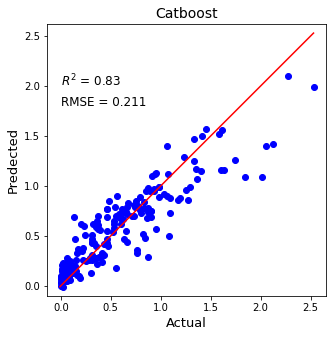

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.83', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.211', fontsize = 12)
plt.title('Catboost', fontsize = 14)
plt.show()

In [29]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'Feature Importance')

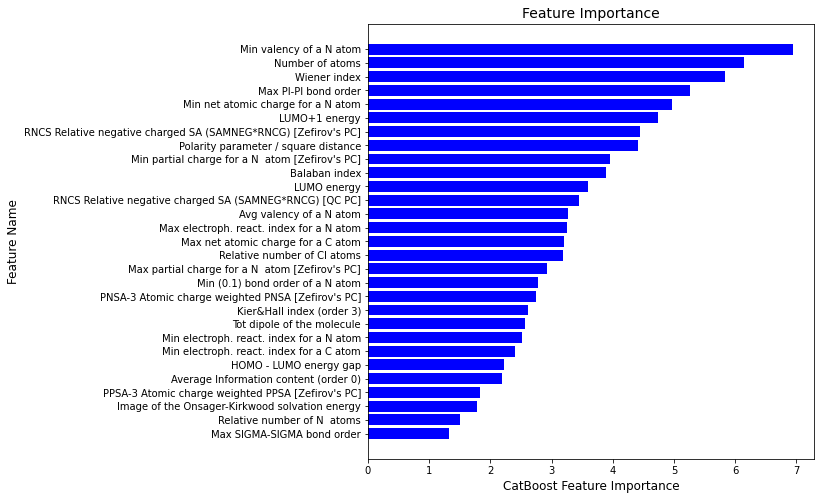

In [30]:
plt.figure(figsize=(8,8))
plt.barh(x.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='blue')
plt.xlabel("CatBoost Feature Importance", fontsize = 12)
plt.ylabel("Feature Name", fontsize = 12)
plt.title('Feature Importance', fontsize = 14)

In [31]:
import shap

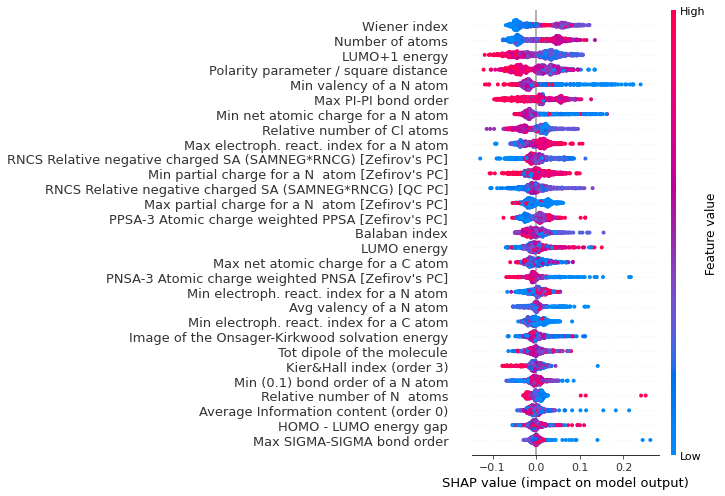

In [32]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,7], max_display=x_train.shape[0])
plt.gcf().set_size_inches(10,7)

In [33]:
shap_values

array([[-4.35437352e-02, -2.45387364e-02, -2.96086593e-02, ...,
        -1.39043650e-02,  6.89848115e-03, -1.50649437e-02],
       [-4.72670929e-02, -2.07281136e-02, -4.01489813e-02, ...,
        -1.94474598e-02, -3.07222578e-02, -3.26928159e-03],
       [ 8.58891786e-02,  1.83354886e-02,  5.91371679e-02, ...,
         1.47398292e-01,  5.81947712e-02,  5.42457458e-03],
       ...,
       [-5.42842805e-02, -3.00939424e-02, -4.71115555e-02, ...,
        -1.20830260e-02,  1.29385112e-04, -1.77825521e-02],
       [ 5.90658719e-02,  1.40351655e-02,  1.62444602e-02, ...,
        -2.20663600e-02, -2.76673755e-02,  8.20833987e-03],
       [ 5.64155265e-02,  6.67595323e-03,  2.44507066e-02, ...,
        -4.25510525e-02, -9.76236851e-03, -3.76046371e-03]])

In [34]:
shap_values.shape

(844, 29)

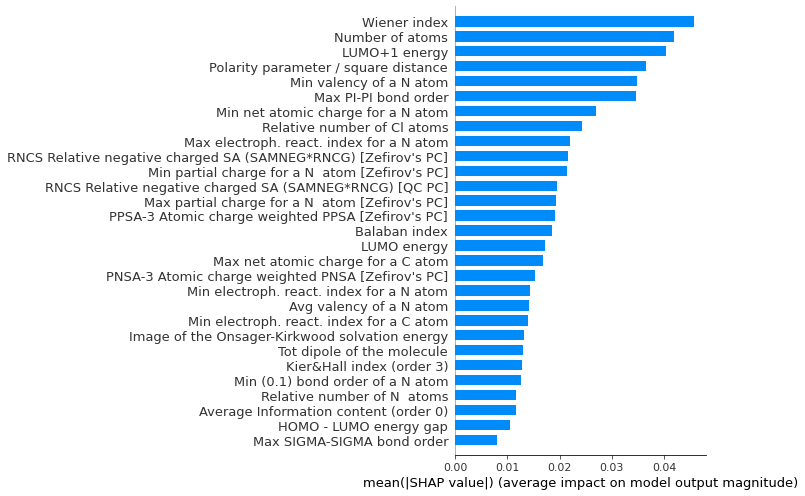

In [35]:
shap.summary_plot(shap_values, x_train,x.columns, plot_type="bar", max_display=x.shape[1], plot_size=[10,7])

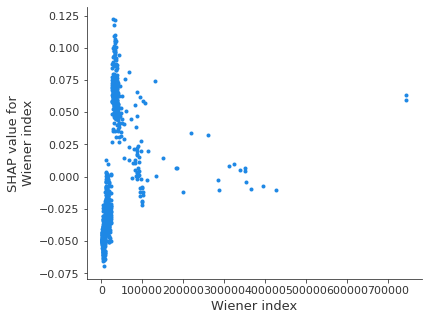

In [36]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index=None)

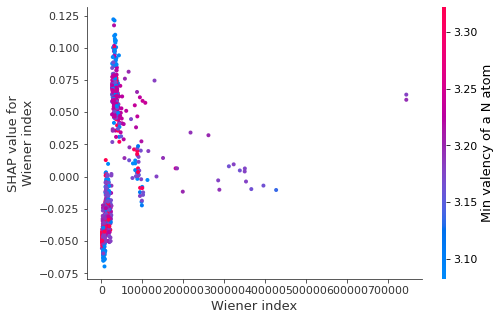

In [37]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index="auto")

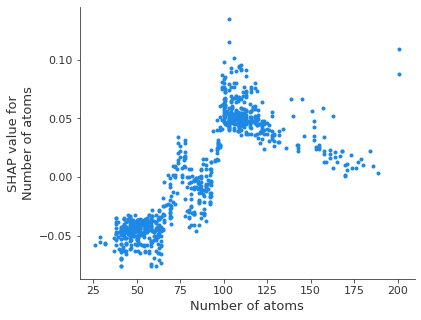

In [38]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index=None)

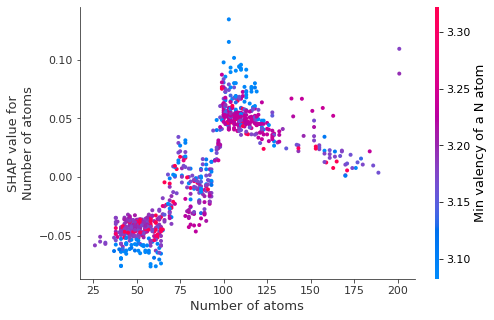

In [39]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index="auto")

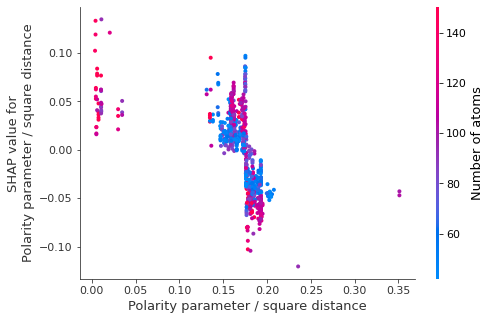

In [40]:
shap.dependence_plot("Polarity parameter / square distance", shap_values, x_train, x.columns, interaction_index="auto")

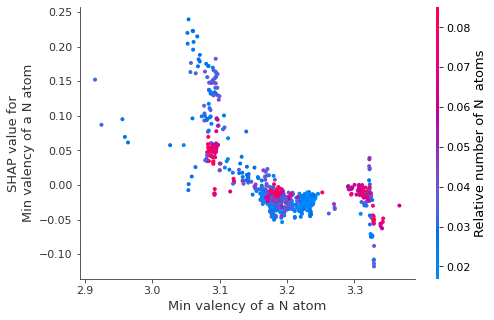

In [41]:
shap.dependence_plot("Min valency of a N atom", shap_values, x_train, x.columns, interaction_index="auto")

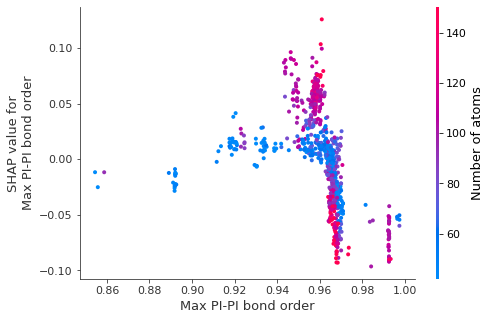

In [42]:
shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

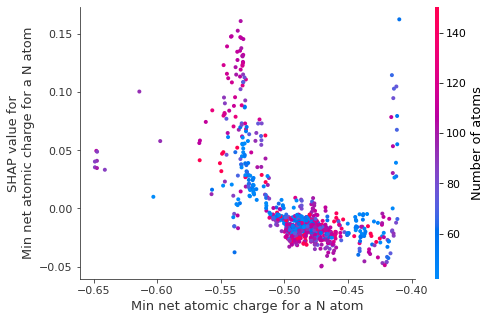

In [43]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

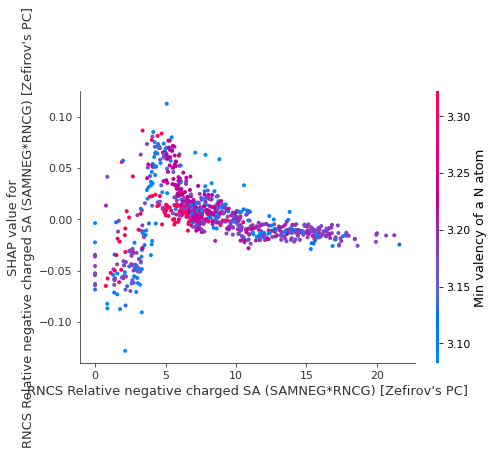

In [44]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

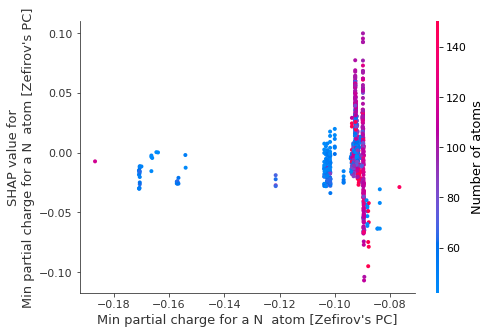

In [45]:
shap.dependence_plot("Min partial charge for a N  atom [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto") 

In [46]:
random_idx = np.random.randint(len(x_train))
random_idx

197

In [47]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)

In [48]:
shap_explainer_values = explainer(x_train, y_train)

In [49]:
type(shap_explainer_values)

shap._explanation.Explanation

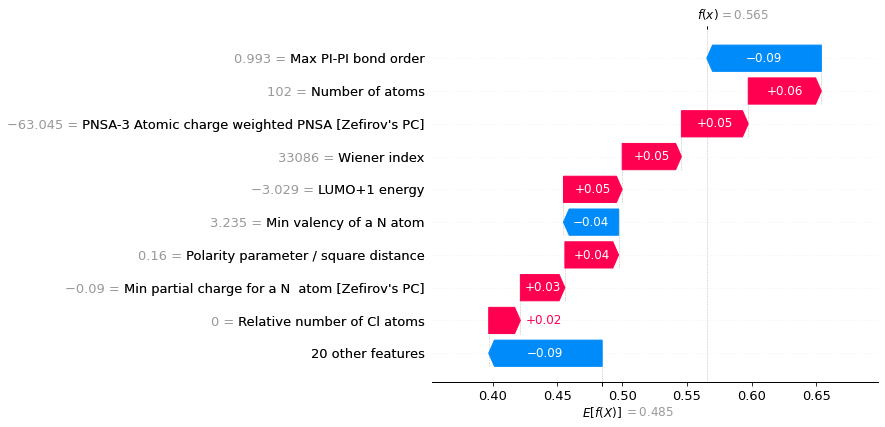

In [50]:
shap.waterfall_plot(shap_explainer_values[843],)

In [51]:
shap.initjs()

In [52]:
shap.force_plot(shap_explainer_values)

In [53]:
shap.force_plot(shap_explainer_values[10,:] ,  x_train, x.columns)

In [54]:
np.random.seed(2021)
random_mask = np.random.choice(a=[0,1], size=y_train.shape, p=[0.9,0.1])
shap.force_plot(explainer.expected_value, pd.DataFrame(shap_values)[random_mask == 1].values, x_train[random_mask == 1])

In [55]:
regressor1 = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [ ]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [ ]:
regressor_grid.fit (x_train, y_train)

In [ ]:
regressor_grid.best_params_

In [ ]:
regressor_grid.best_score_

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
PartialDependenceDisplay.from_estimator(regressor, x_train, features, target=0)

In [ ]:
shap.plots.waterfall(shap_values[x_train])